In [1]:
import pandas as pd # For creating dataframes and calculating correlation matrices.
from pandas.api.types import CategoricalDtype # For correctly setting some dataframe colummns as being of categorical type

from pathlib import Path # For defining the path directory in which the data is stored

import seaborn as sn   # For creating visual representations
import matplotlib
import matplotlib.pyplot as plt # of correlation matrices.

import numpy as np #For numerical opertions

import networkx as nx
#import community as community_louvain
import matplotlib.cm as cm


In [ ]:
#Read .csv

#Desity
density_2004 = pd.read_csv('Metrics/density_2004.csv',index_col=0)
density_2009 = pd.read_csv('Metrics/density_2009.csv',index_col=0)
density_2014 = pd.read_csv('Metrics/density_2014.csv',index_col=0)
density_2019 = pd.read_csv('Metrics/density_2019.csv',index_col=0)

#Transition
Transition_04_09 = pd.read_csv('Metrics/transition_04_09.csv',index_col=0)
Transition_04_14 = pd.read_csv('Metrics/transition_04_14.csv',index_col=0)
Transition_04_19 = pd.read_csv('Metrics/transition_04_19.csv',index_col=0)

Transition_09_14 = pd.read_csv('Metrics/transition_09_14.csv',index_col=0)
Transition_09_19 = pd.read_csv('Metrics/transition_09_19.csv',index_col=0)

Transition_14_19 = pd.read_csv('Metrics/transition_14_19.csv',index_col=0)

#Underdeveloped

underdeveloped_04_09 = pd.read_csv('Metrics/underdeveloped_04_09.csv',index_col=0)
underdeveloped_04_14 = pd.read_csv('Metrics/underdeveloped_04_14.csv',index_col=0)
underdeveloped_04_19 = pd.read_csv('Metrics/underdeveloped_04_19.csv',index_col=0)

underdeveloped_09_14 = pd.read_csv('Metrics/underdeveloped_09_14.csv',index_col=0)
underdeveloped_09_19 = pd.read_csv('Metrics/underdeveloped_09_19.csv',index_col=0)

underdeveloped_14_19 = pd.read_csv('Metrics/underdeveloped_14_19.csv',index_col=0)

#Developed

developed_04 = pd.read_csv('Metrics/developed_04.csv',index_col=0)
developed_09 = pd.read_csv('Metrics/developed_09.csv',index_col=0)
developed_14 = pd.read_csv('Metrics/developed_14.csv',index_col=0)
developed_19 = pd.read_csv('Metrics/developed_19.csv',index_col=0)

#Discovery Factor

Discovery_04_09 = pd.read_csv('Metrics/discovery_04_09.csv',index_col=0)
Discovery_04_14 = pd.read_csv('Metrics/discovery_04_14.csv',index_col=0)
Discovery_04_19 = pd.read_csv('Metrics/discovery_04_19.csv',index_col=0)
Discovery_09_14 = pd.read_csv('Metrics/discovery_09_14.csv',index_col=0)
Discovery_09_19 = pd.read_csv('Metrics/discovery_09_19.csv',index_col=0)
Discovery_14_19 = pd.read_csv('Metrics/discovery_14_19.csv',index_col=0)

#Proximity 

#Read excel

Prox_2004_df = pd.read_excel("edo-cae_ue04-19.xlsx", sheet_name='Prox04').set_index('Row Labels')
Prox_2009_df = pd.read_excel("edo-cae_ue04-19.xlsx", sheet_name='Prox09').set_index('Row Labels')
Prox_2014_df = pd.read_excel("edo-cae_ue04-19.xlsx", sheet_name='Prox14').set_index('Row Labels')
Prox_2019_df = pd.read_excel("edo-cae_ue04-19.xlsx", sheet_name='Prox19').set_index('Row Labels')

In [ ]:
def normal(x,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi*sigma**2))

In [ ]:
# Get columns that contain only numeric values
density_2004_num = density_2004.select_dtypes(include='number')
density_2009_num = density_2009.select_dtypes(include='number')
density_2014_num = density_2014.select_dtypes(include='number')
density_2019_num = density_2019.select_dtypes(include='number')

#Make array from matrixes
density_2004_array =  np.matrix(density_2004_num).A1

density_2009_array =  np.matrix(density_2009_num).A1

density_2014_array =  np.matrix(density_2014_num).A1

density_2019_array =  np.matrix(density_2019_num).A1

#Histograms

bins=100

count_04,base_04 = np.histogram(density_2004_array, bins=bins,density=False)
count_09,base_09 = np.histogram(density_2009_array, bins=bins,density=False)
count_14,base_14 = np.histogram(density_2014_array, bins=bins,density=False)
count_19,base_19 = np.histogram(density_2019_array, bins=bins,density=False)

#Probability

prob_dens_04 = count_04/len(density_2004_array)
prob_dens_09 = count_09/len(density_2009_array)
prob_dens_14 = count_14/len(density_2014_array)
prob_dens_19 = count_19/len(density_2019_array)

mu_04,sigma_04=(np.mean(density_2004_array),np.std(density_2004_array))
plt.plot(base_04[1:len(base_04)],prob_dens_04,label= f'2004, Mean={mu_04:.2f},Std={sigma_04:.2f}')
mu_09,sigma_09=(np.mean(density_2009_array),np.std(density_2009_array))
plt.plot(base_09[1:len(base_09)],prob_dens_09,label= f'2009, Mean={mu_09:.2f},Std={sigma_09:.2f}')
mu_14,sigma_14=(np.mean(density_2014_array),np.std(density_2014_array))
plt.plot(base_14[1:len(base_14)],prob_dens_14,label=f'2014, Mean={mu_14:.2f},Std={sigma_14:.2f}')
mu_19,sigma_19=(np.mean(density_2019_array),np.std(density_2019_array))
plt.plot(base_19[1:len(base_19)],prob_dens_19,label= f'2019, Mean={mu_19:.2f},Std={sigma_19:.2f}')

#count_04,base_04 = np.histogram(density_2004_array, bins=bins,density=True)
#count_09,base_09 = np.histogram(density_2009_array, bins=bins,density=True)
#count_14,base_14 = np.histogram(density_2014_array, bins=bins,density=True)
#count_19,base_19 = np.histogram(density_2019_array, bins=bins,density=True)



#plt.plot(base_04[1:len(base_04)],count_04,label= '2004')

#plt.plot(base_09[1:len(base_09)],count_09,label= '2009')

#plt.plot(base_14[1:len(base_14)],count_14,label= '2014')

#plt.plot(base_19[1:len(base_19)],count_19,label= '2019')




plt.xlabel(r'Density $\omega$',size=20)
plt.ylabel(r'$P(\omega)$',size=20)
plt.legend()
plt.show()


In [ ]:
# Get columns that contain only numeric values
Prox_2004_num = Prox_2004_df.select_dtypes(include='number')
Prox_2009_num = Prox_2009_df.select_dtypes(include='number')
Prox_2014_num = Prox_2014_df.select_dtypes(include='number')
Prox_2019_num = Prox_2019_df.select_dtypes(include='number')

#Make array from matrixes
Prox_2004_array =  [prox for prox in np.matrix(Prox_2004_num).A1 if prox!=1]

Prox_2009_array =  [prox for prox in np.matrix(Prox_2009_num).A1 if prox!=1]

Prox_2014_array =  [prox for prox in np.matrix(Prox_2014_num).A1 if prox!=1]

Prox_2019_array =  [prox for prox in np.matrix(Prox_2019_num).A1 if prox!=1]



#Histograms

bins=50

count_04,base_04 = np.histogram(Prox_2004_array, bins=bins,density=False)
count_09,base_09 = np.histogram(Prox_2009_array, bins=bins,density=False)
count_14,base_14 = np.histogram(Prox_2014_array, bins=bins,density=False)
count_19,base_19 = np.histogram(Prox_2019_array, bins=bins,density=False)


#Probability

#Probability

prob_dens_04 = count_04/len(Prox_2004_array)
prob_dens_09 = count_09/len(Prox_2009_array)
prob_dens_14 = count_14/len(Prox_2014_array)
prob_dens_19 = count_19/len(Prox_2019_array)


plt.plot(base_04[1:len(base_04)],prob_dens_04,label= '2004')
plt.plot(base_09[1:len(base_09)],prob_dens_09,label= '2009')
plt.plot(base_14[1:len(base_14)],prob_dens_14,label= '2014')
plt.plot(base_19[1:len(base_19)],prob_dens_19,label= '2019')



plt.xlabel(r'Proximity $\phi$',size=20)
plt.ylabel(r'$P(\phi)$',size=20)
plt.title('México',size=20)
plt.legend()
plt.show()


In [ ]:
Estados = Transition_04_19['Estado'].values
Estados

In [ ]:
for Estado in Estados:
    # Get columns that contain only numeric values in Estado
    density_2004_num = density_2004[density_2004['Estado']==Estado].select_dtypes(include='number')
    density_2009_num = density_2009[density_2009['Estado']==Estado].select_dtypes(include='number')
    density_2014_num = density_2014[density_2014['Estado']==Estado].select_dtypes(include='number')
    density_2019_num = density_2019[density_2019['Estado']==Estado].select_dtypes(include='number')

    #Make array from matrixes
    density_2004_array =  np.matrix(density_2004_num).A1

    density_2009_array =  np.matrix(density_2009_num).A1

    density_2014_array =  np.matrix(density_2014_num).A1

    density_2019_array =  np.matrix(density_2019_num).A1

    #Histograms

    bins=50

    count_04,base_04 = np.histogram(density_2004_array, bins=bins,density=False)
    count_09,base_09 = np.histogram(density_2009_array, bins=bins,density=False)
    count_14,base_14 = np.histogram(density_2014_array, bins=bins,density=False)
    count_19,base_19 = np.histogram(density_2019_array, bins=bins,density=False)
    
    #plt.plot(base_04[1:len(base_04)],count_04,label= '2004')
    #plt.plot(base_09[1:len(base_09)],count_09,label= '2009')
    #plt.plot(base_14[1:len(base_14)],count_14,label= '2014')
    #plt.plot(base_19[1:len(base_19)],count_19,label= '2019')


    #Probability

    prob_dens_04 = count_04/len(density_2004_array)
    prob_dens_09 = count_09/len(density_2009_array)
    prob_dens_14 = count_14/len(density_2014_array)
    prob_dens_19 = count_19/len(density_2019_array)

    #plt.plot(base_04[1:len(base_04)],prob_dens_04,label= '2004')
    #plt.plot(base_09[1:len(base_09)],prob_dens_09,label= '2009')
    #plt.plot(base_14[1:len(base_14)],prob_dens_14,label= '2014')
    #plt.plot(base_19[1:len(base_19)],prob_dens_19,label= '2019')
    
    mu_04,sigma_04=(np.mean(density_2004_array),np.std(density_2004_array))
    plt.plot(base_04[1:len(base_04)],prob_dens_04,label= f'2004, Mean={mu_04:.2f},Std={sigma_04:.2f}')
    mu_09,sigma_09=(np.mean(density_2009_array),np.std(density_2009_array))
    plt.plot(base_09[1:len(base_09)],prob_dens_09,label= f'2009, Mean={mu_09:.2f},Std={sigma_09:.2f}')
    mu_14,sigma_14=(np.mean(density_2014_array),np.std(density_2014_array))
    plt.plot(base_14[1:len(base_14)],prob_dens_14,label=f'2014, Mean={mu_14:.2f},Std={sigma_14:.2f}')
    mu_19,sigma_19=(np.mean(density_2019_array),np.std(density_2019_array))
    plt.plot(base_19[1:len(base_19)],prob_dens_19,label= f'2019, Mean={mu_19:.2f},Std={sigma_19:.2f}')



    plt.xlabel(r'Density $\omega$',size=20)
    plt.ylabel(r'$P(\omega)$',size=20)
    plt.title(Estado,size=20)
    plt.legend()
    plt.show()



In [ ]:
def normal(x,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi*sigma**2))

In [ ]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

def dens_prob(Estado,trans_df,under_df,dens_df,year1,year2):
    
    #Get transition and underdeveloped products
    
    products =  [string for string in trans_df.columns.values if string.isdigit()]
    trans_prod = []
    under_prod = []
    for prod in products:
        trans = trans_df.loc[trans_df['Estado']==Estado,prod].values[0]
        under = under_df.loc[under_df['Estado']==Estado,prod].values[0]

        if trans == 1:
            trans_prod.append(prod)

        if under == 1:
            under_prod.append(prod)

    trans_prod = set(trans_prod) 
    under_prod = set(under_prod) 
    
    #Get density of transition and underdeveloped products

    dens_trans = []
    for prod in trans_prod:
        dens_trans.append(dens_df.loc[dens_df['Estado']==Estado,prod].values[0])


    dens_under = []
    for prod in under_prod:
        dens_under.append(dens_df.loc[dens_df['Estado']==Estado,prod].values[0])
        
    #Histogram desity

    count_dens_trans,base_dens_trans = np.histogram(dens_trans, bins=50,density=False)
    
    #Probability
    prob_dens_trans = count_dens_trans/len(dens_trans)

    count_dens_under,base_dens_under = np.histogram(dens_under, bins=50,density=False)
    #Probability
    
    prob_dens_under = count_dens_under/len(dens_under)

    f_stat_ANOVA, p_valor_ANOVA = f_oneway(dens_trans, dens_under)
    f_stat_kurskal, p_valor_kurskal = kruskal(dens_trans, dens_under)


    #print("Estadístico F:", dens_trans)
    #print("Valor P:", dens_under)

    plt.plot(base_dens_trans[1:len(base_dens_trans)],prob_dens_trans,'y',label= 'Transition')

    plt.plot(base_dens_under[1:len(base_dens_under)],prob_dens_under,'r',label= 'Underdeveloped')

    plt.xlabel(r'$\omega_j$',size=20)
    plt.ylabel(r'$P(\omega_j)$',size=20)
    plt.title(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}',size=20)
    plt.legend()
    plt.show()
    
    p_anova_flag=0
    if p_valor_ANOVA>0.05:
        print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}')
        p_anova_flag=1
        
    p_kurskal_flag=0
    if p_valor_kurskal>0.05:
        print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}')
        p_kurskal_flag=1
    
    period_str=f'{year1}-{year2}'
        
    return period_str,p_valor_ANOVA,p_valor_kurskal,p_kurskal_flag,p_anova_flag,prob_dens_trans , prob_dens_under




In [ ]:
(period_str,p_valor_ANOVA,p_valor_kurskal,
 p_kurskal_flag,p_anova_flag,prob_dens_trans,prob_dens_under) = dens_prob(Estado='San Luis Potosí',
                                            trans_df=Transition_04_19,
                                            under_df=underdeveloped_04_19,
                                            dens_df=density_2004,
                                            year1=2004,year2=2019)


In [ ]:
for Estado in Estados:
    (period_str,p_valor_ANOVA,p_valor_kurskal,
 p_kurskal_flag,p_anova_flag,prob_dens_trans,prob_dens_under) = dens_prob(Estado=Estado,
                                                trans_df=Transition_04_19,
                                                under_df=underdeveloped_04_19,
                                                dens_df=density_2019,
                                                year1=2004,year2=2019)



Si el valor p es menor que su nivel de significancia (por ejemplo, 0.05), puede rechazar la hipótesis nula y concluir que hay diferencias significativas entre las medias de ambos grupos. En caso contrario, no hay suficiente evidencia para concluir que hay diferencias significativas entre las medias.

In [ ]:
est_per_p_val=[]
for Estado in Estados:
    (period_str,p_valor_ANOVA,p_valor_kurskal,
 p_kurskal_flag,p_anova_flag,prob_dens_trans,prob_dens_under) = dens_prob(Estado=Estado,
                                                trans_df=Transition_04_19,
                                                under_df=underdeveloped_04_19,
                                                dens_df=density_2004,
                                                year1=2004,year2=2019)
    
    est_per_p_val.append([Estado,period_str,p_anova_flag,p_kurskal_flag])
    
df_04_19=pd.DataFrame(est_per_p_val,columns=['Estado','Periodo','Anova_flag','Kurskal_flag'])


In [ ]:
df_04_19

In [ ]:
est_per_p_val=[]

for Estado in Estados:
    (period_str,p_valor_ANOVA,p_valor_kurskal,
 p_kurskal_flag,p_anova_flag,prob_dens_trans,prob_dens_under)  = dens_prob(Estado=Estado,
                                                trans_df=Transition_04_09,
                                                under_df=underdeveloped_04_09,
                                                dens_df=density_2004,
                                                year1=2004,year2=2009)
    est_per_p_val.append([Estado,period_str,p_anova_flag,p_kurskal_flag])
    
df_04_09=pd.DataFrame(est_per_p_val,columns=['Estado','Periodo','Anova_flag','Kurskal_flag'])



In [ ]:
df_04_09

In [ ]:
est_per_p_val=[]

for Estado in Estados:
    (period_str,p_valor_ANOVA,p_valor_kurskal,
 p_kurskal_flag,p_anova_flag,prob_dens_trans,prob_dens_under)  = dens_prob(Estado=Estado,
                                                trans_df=Transition_09_14,
                                                under_df=underdeveloped_09_14,
                                                dens_df=density_2009,
                                                year1=2009,year2=2014)
    est_per_p_val.append([Estado,period_str,p_anova_flag,p_kurskal_flag])
    
df_09_14=pd.DataFrame(est_per_p_val,columns=['Estado','Periodo','Anova_flag','Kurskal_flag'])



In [ ]:
df_09_14

In [ ]:
est_per_p_val=[]

for Estado in Estados:
    (period_str,p_valor_ANOVA,p_valor_kurskal,
 p_kurskal_flag,p_anova_flag,prob_dens_trans,prob_dens_under)  = dens_prob(Estado=Estado,
                                                trans_df=Transition_14_19,
                                                under_df=underdeveloped_14_19,
                                                dens_df=density_2014,
                                                year1=2014,year2=2019)
    est_per_p_val.append([Estado,period_str,p_anova_flag,p_kurskal_flag])
    
df_14_19=pd.DataFrame(est_per_p_val,columns=['Estado','Periodo','Anova_flag','Kurskal_flag'])



In [ ]:
df_14_19

In [49]:
# P(Hj)

def discovery_prob(Estado,trans_df,under_df,disc_df,year1,year2):
    
    #Get transition and underdeveloped products
    
    products =  [string for string in trans_df.columns.values if string.isdigit()]
    trans_prod = []
    under_prod = []
    for prod in products:
        trans = trans_df.loc[trans_df['Estado']==Estado,prod].values[0]
        under = under_df.loc[under_df['Estado']==Estado,prod].values[0]

        if trans == 1:
            trans_prod.append(prod)

        if under == 1:
            under_prod.append(prod)

    trans_prod = set(trans_prod) 
    under_prod = set(under_prod) 
    
    #Get discovery factor of transition and underdeveloped products

    disc_trans = []
    for prod in trans_prod:
        disc_trans.append(disc_df[prod].values[0])
        
    disc_trans = [val for val in disc_trans if val!=0.0]

    disc_under = []
    for prod in under_prod:
        disc_under.append(disc_df[prod].values[0])
        
    disc_under = [val for val in disc_under if val!=0.0]   
    
    #Histogram

    count_disc_trans,base_disc_trans = np.histogram(disc_trans, bins=50,density=False)
    
    #Probability
    prob_disc_trans = count_disc_trans/len(disc_trans)
    
    #Histogram

    count_disc_under,base_disc_under = np.histogram(disc_under, bins=50,density=False)
    
    #Probability
    
    prob_disc_under = count_disc_under/len(disc_under)
    
    f_stat_ANOVA, p_valor_ANOVA = f_oneway(disc_trans, disc_under)
    f_stat_kurskal, p_valor_kurskal = kruskal(disc_trans, disc_under)

    plt.plot(base_disc_trans[1:len(base_disc_trans)],prob_disc_trans,'y',label= 'Transition')

    plt.plot(base_disc_under[1:len(base_disc_under)],prob_disc_under,'r',label= 'Underdeveloped')

    plt.xlabel(r'$H_j$',size=20)
    plt.ylabel(r'$P(H_j)$',size=20)
    plt.title(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}',size=20)
    plt.legend()
    plt.show()
    
    if p_valor_ANOVA>0.05 or p_valor_kurskal>0.05:
        print(Estado+f' {year1}-{year2} \n ANOVA: P={p_valor_ANOVA:.3f}\n Kurskal: P={p_valor_kurskal:.3f}')

    return prob_disc_trans , prob_disc_under,disc_trans,disc_under


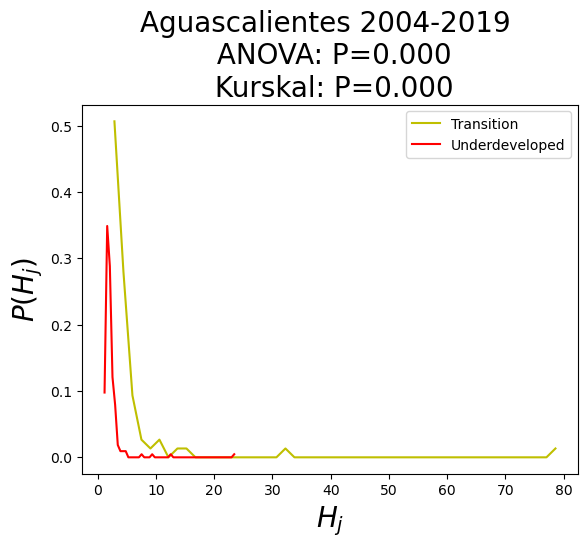

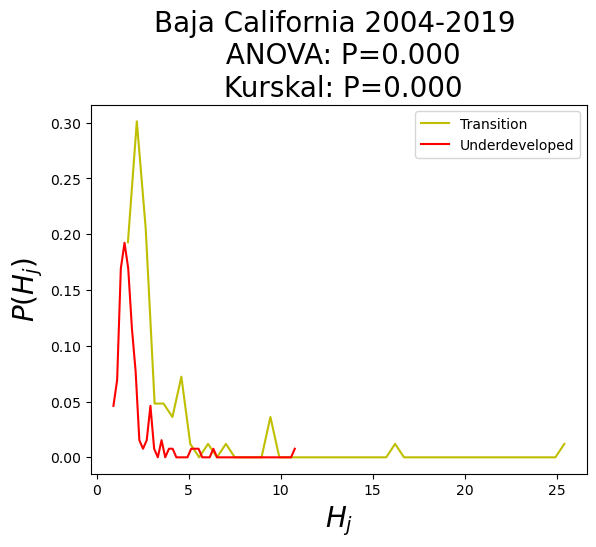

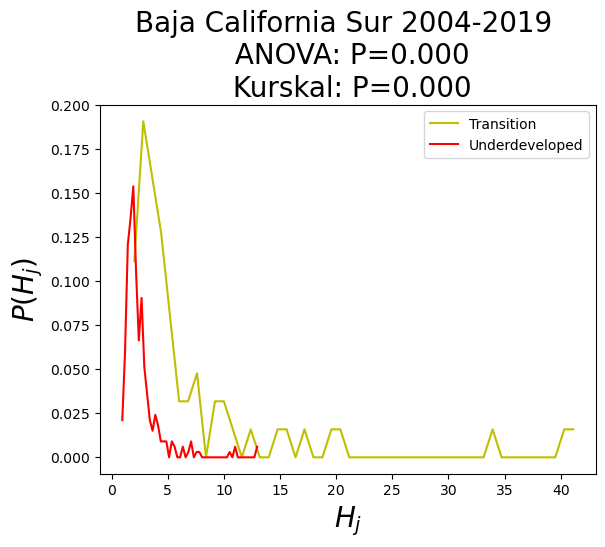

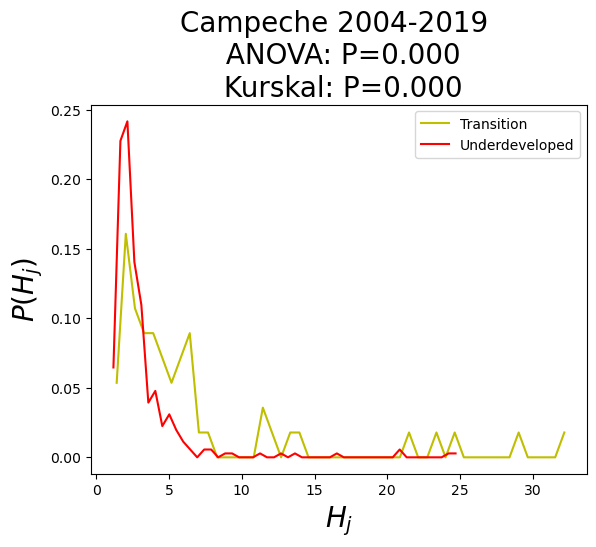

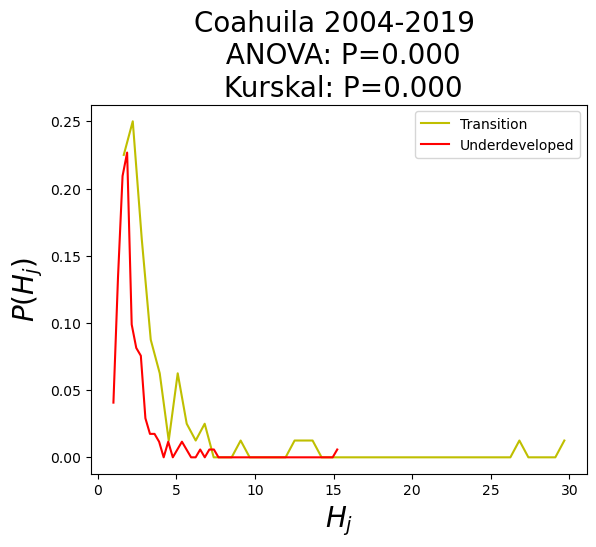

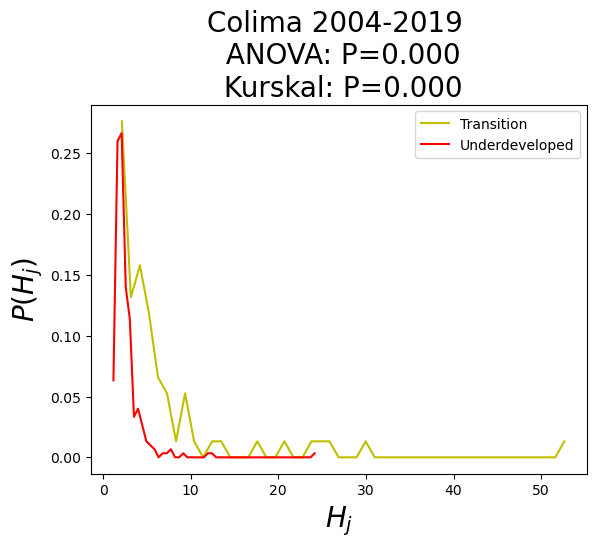

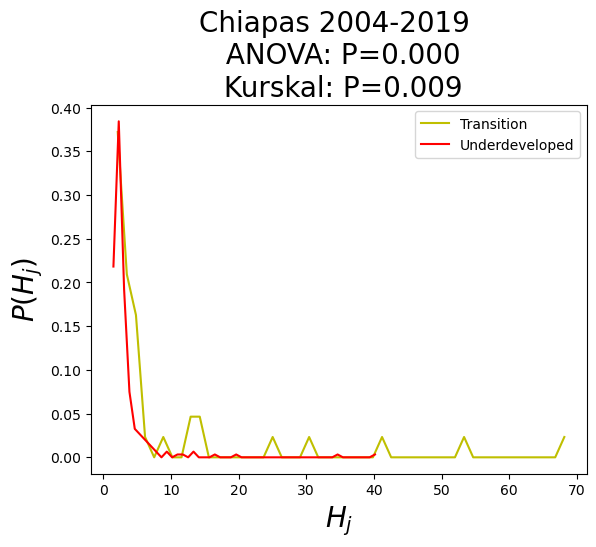

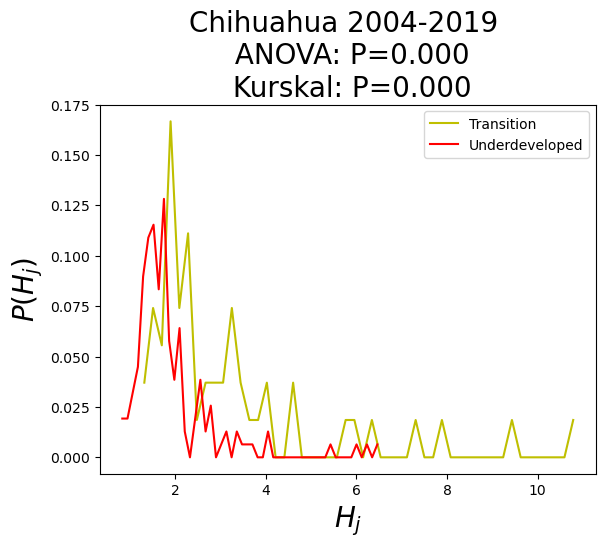

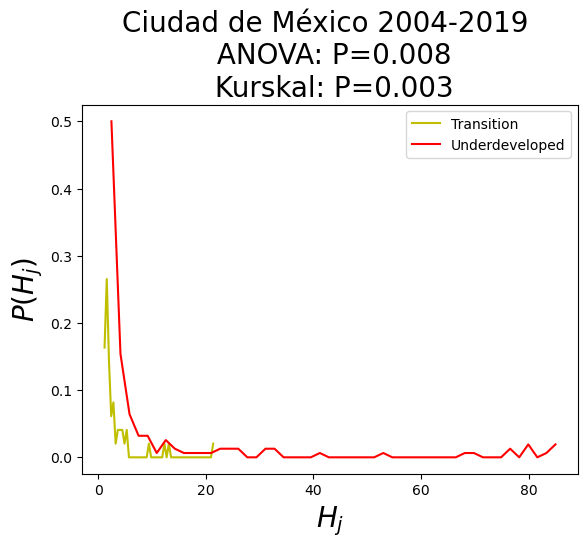

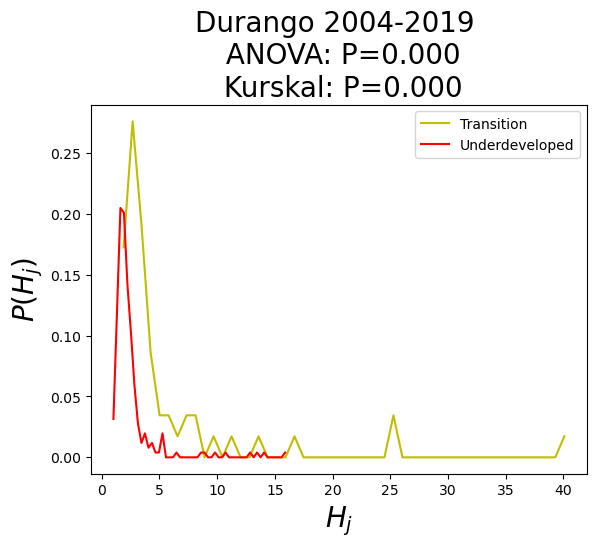

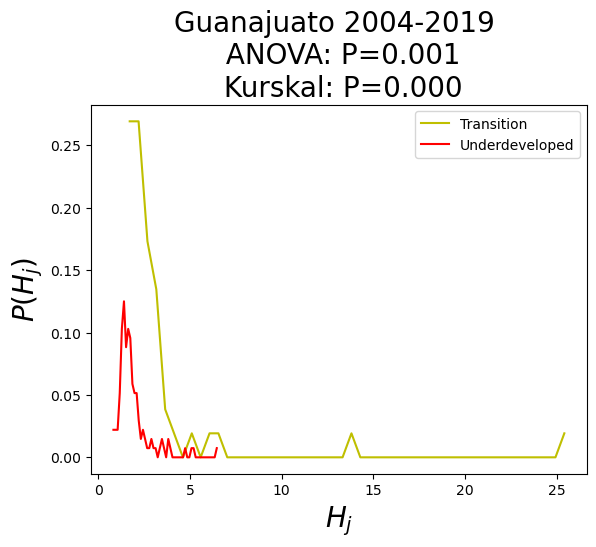

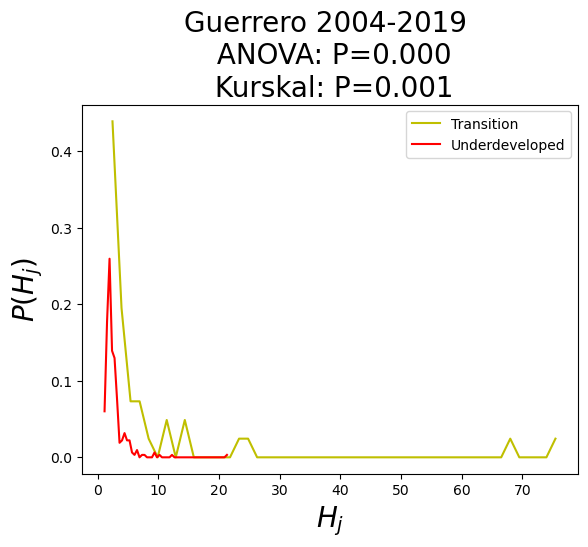

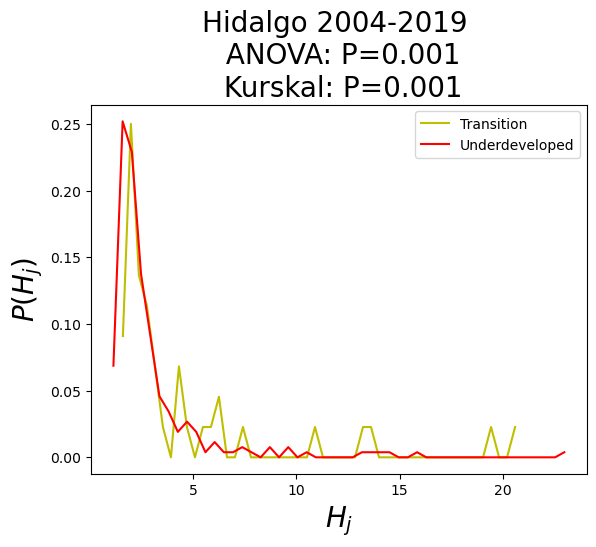

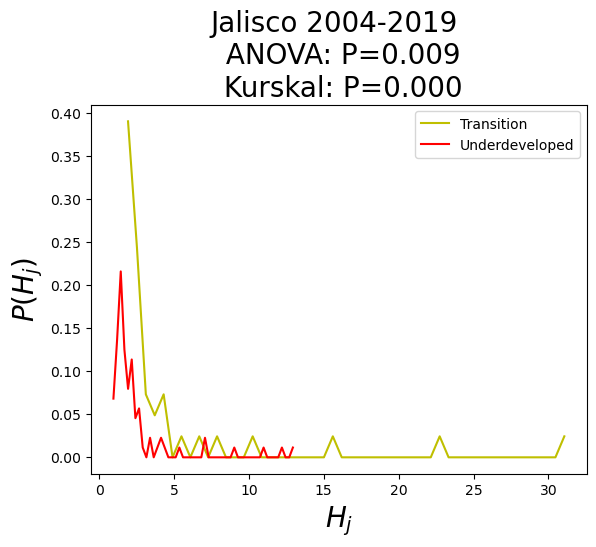

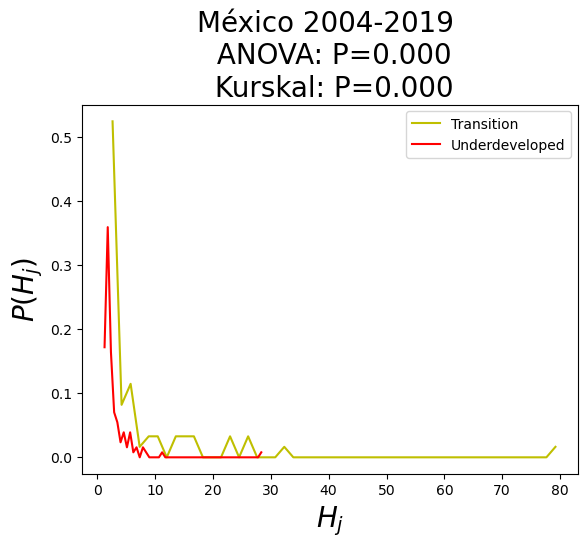

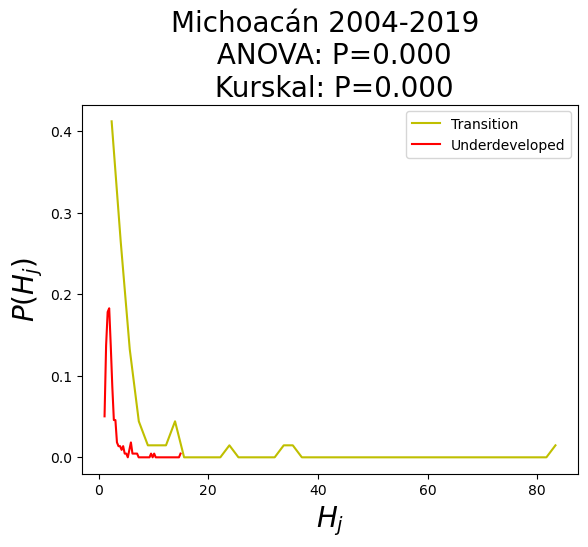

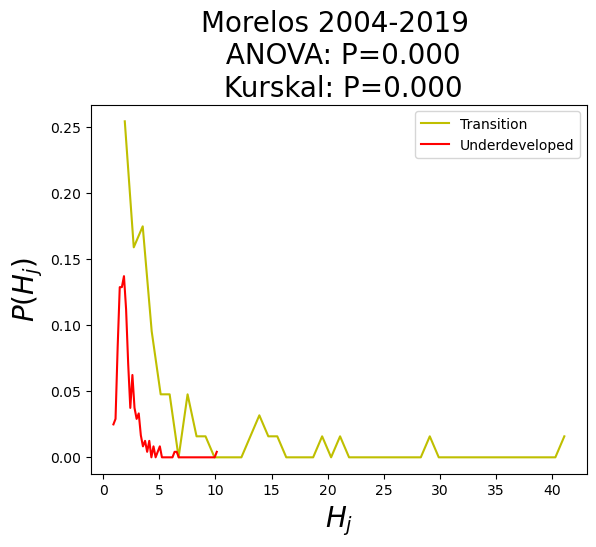

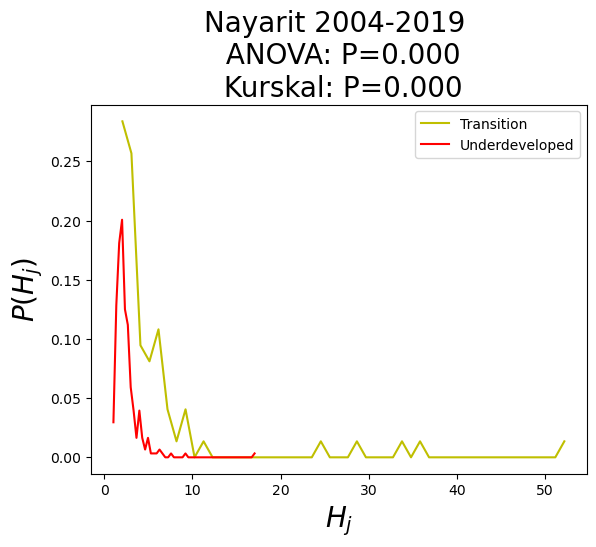

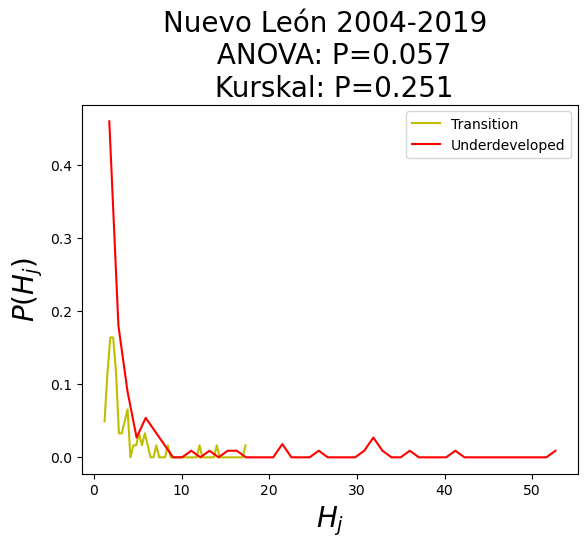

Nuevo León 2004-2019 
 ANOVA: P=0.057
 Kurskal: P=0.251


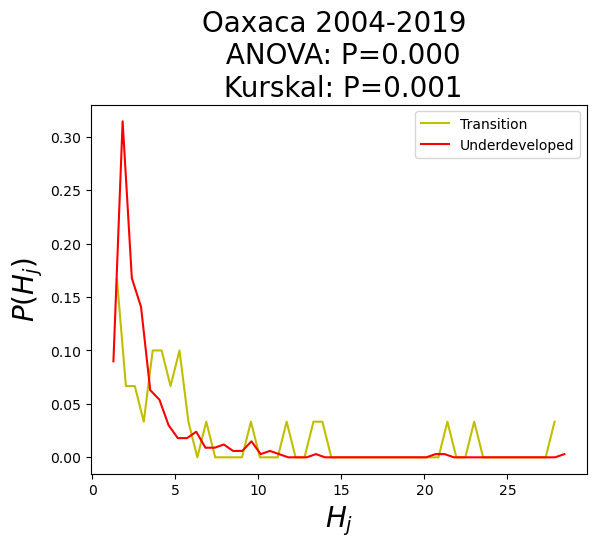

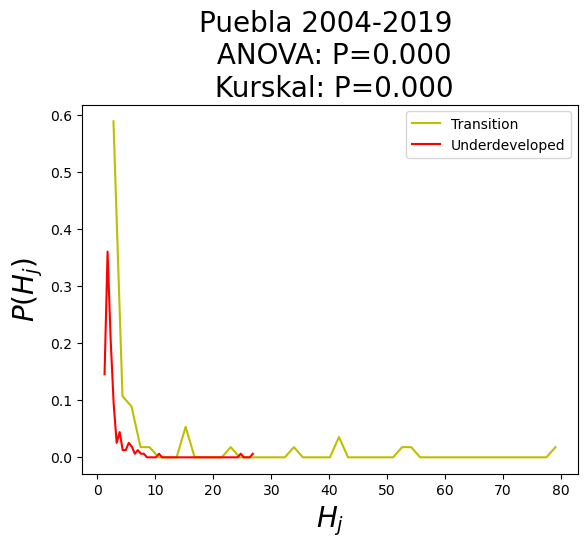

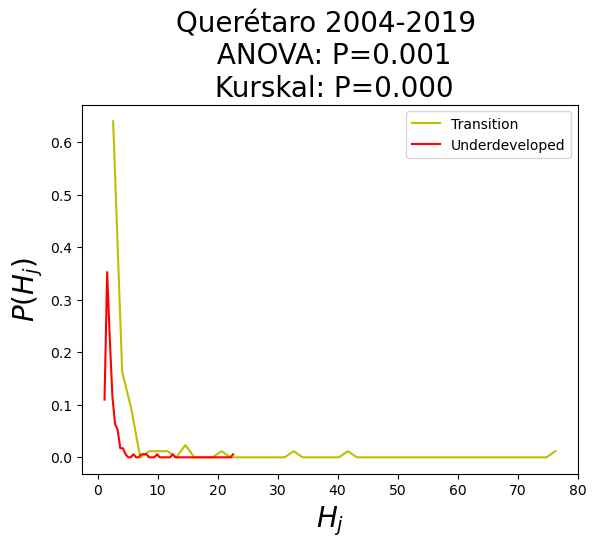

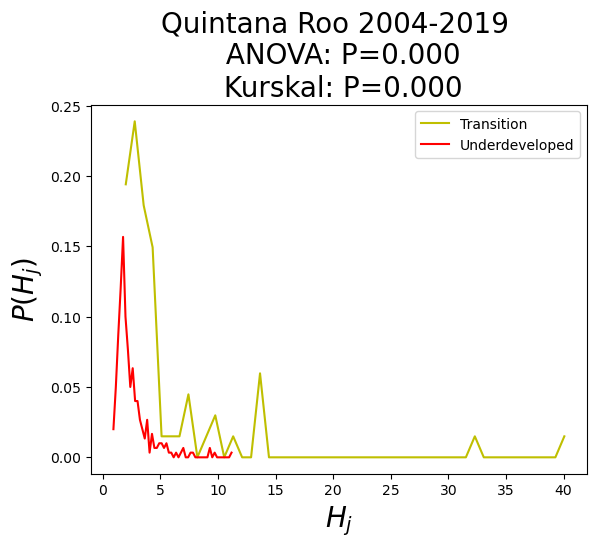

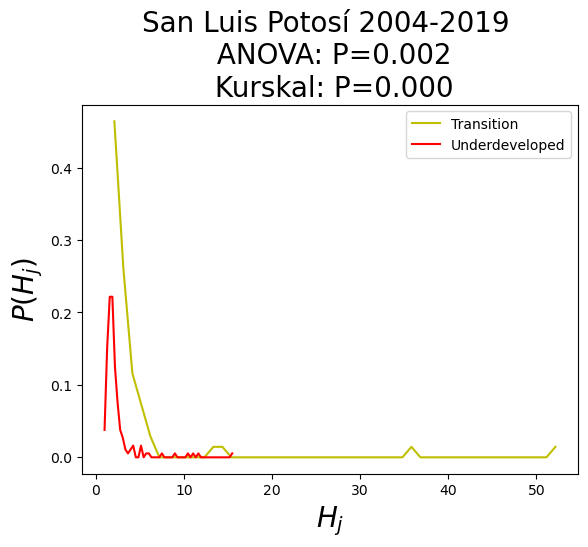

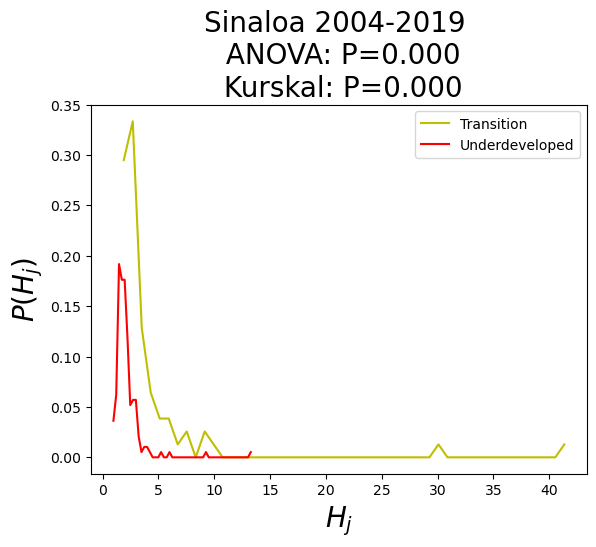

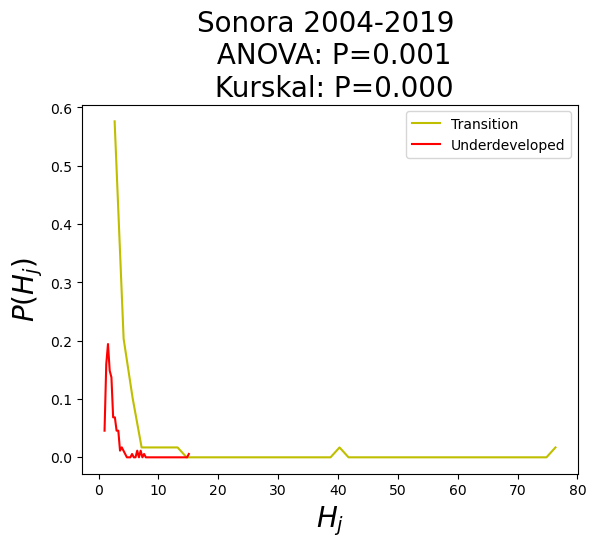

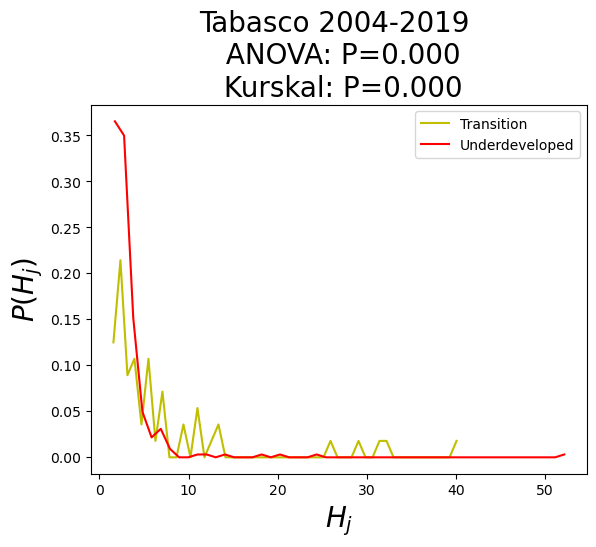

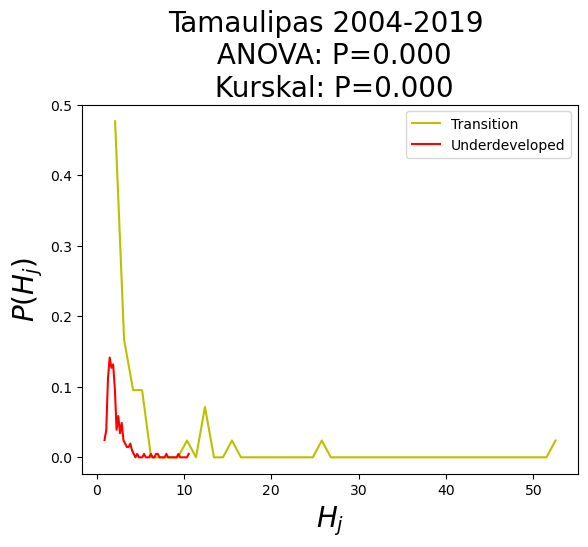

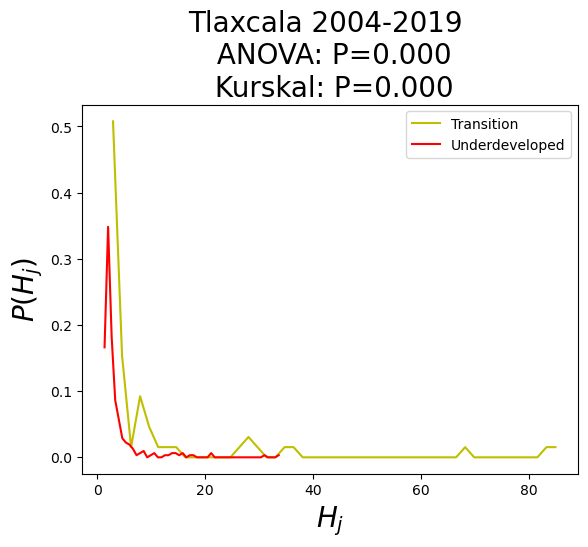

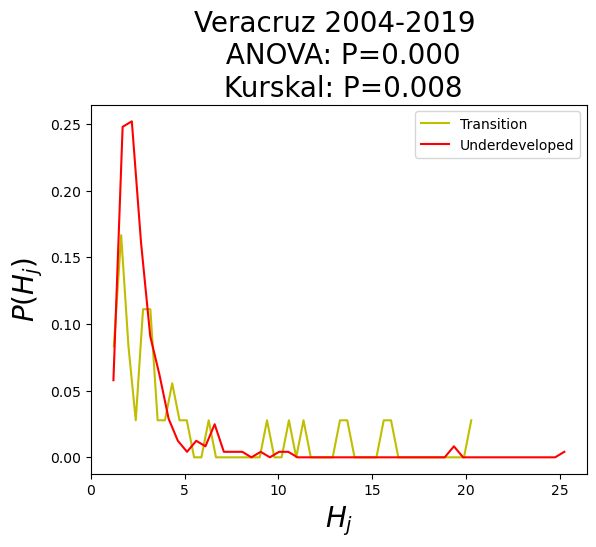

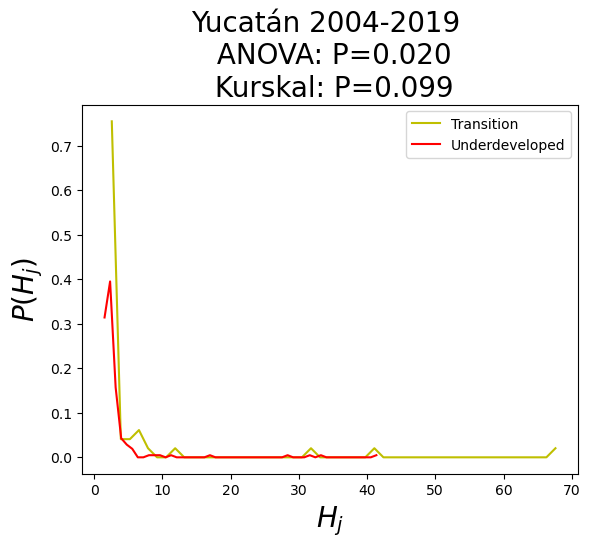

Yucatán 2004-2019 
 ANOVA: P=0.020
 Kurskal: P=0.099


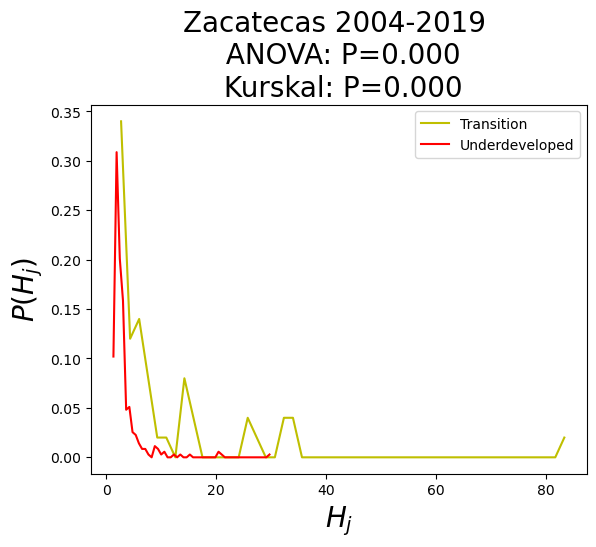

In [50]:
for Estado in Estados:
    prob_disc_trans , prob_disc_under,disc_trans,disc_under = discovery_prob(Estado=Estado,
                                            trans_df=Transition_04_19,
                                            under_df=underdeveloped_04_19,
                                            disc_df=Discovery_04_19,
                                            year1=2004,year2=2019)

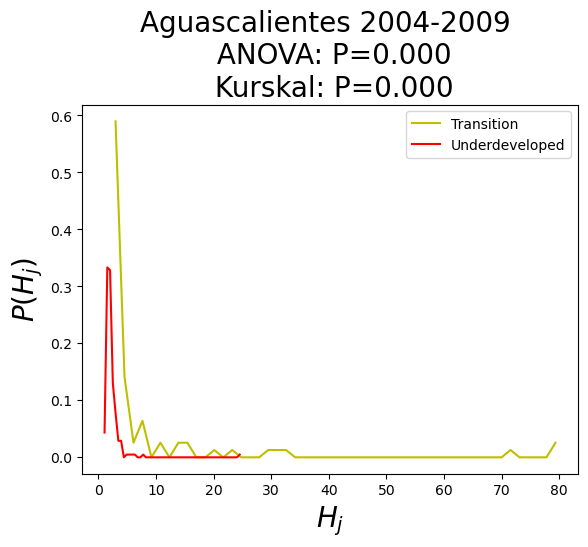

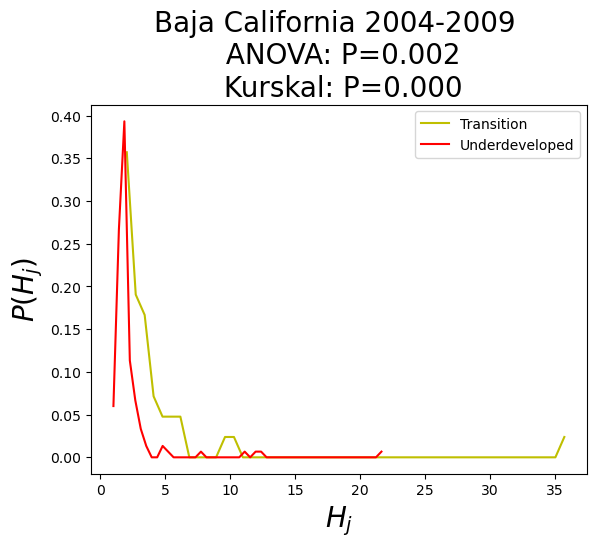

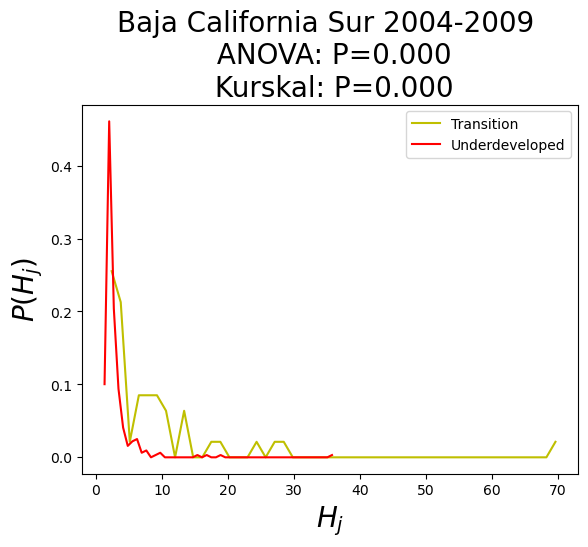

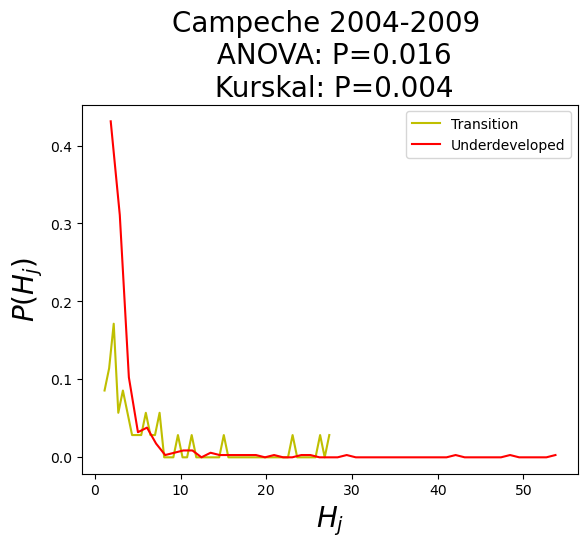

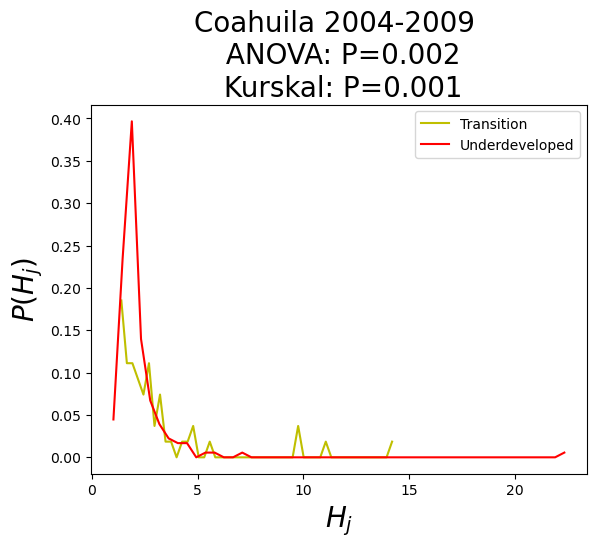

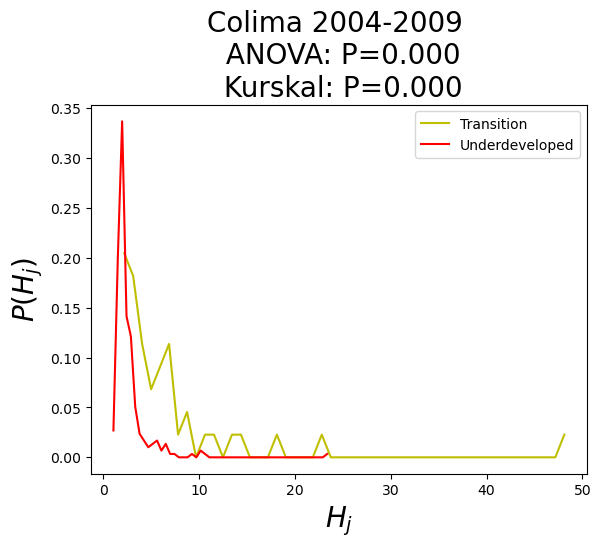

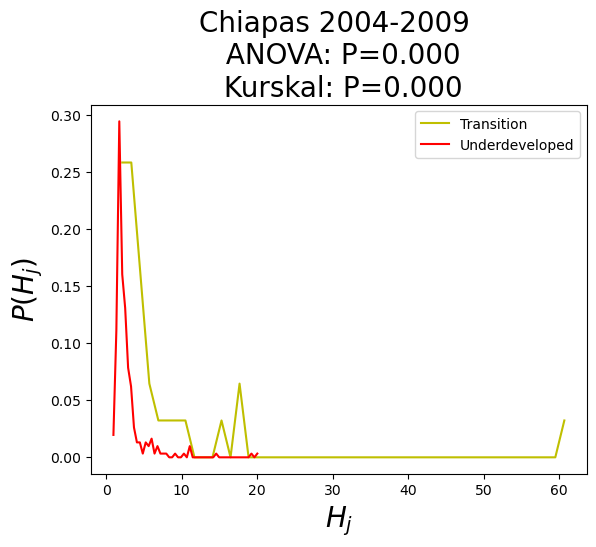

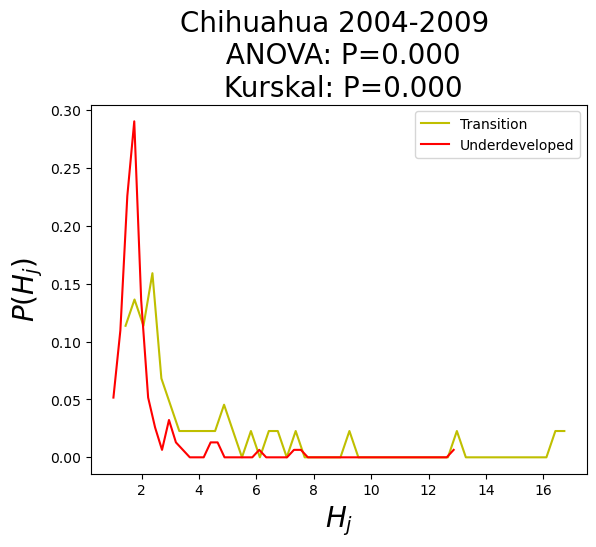

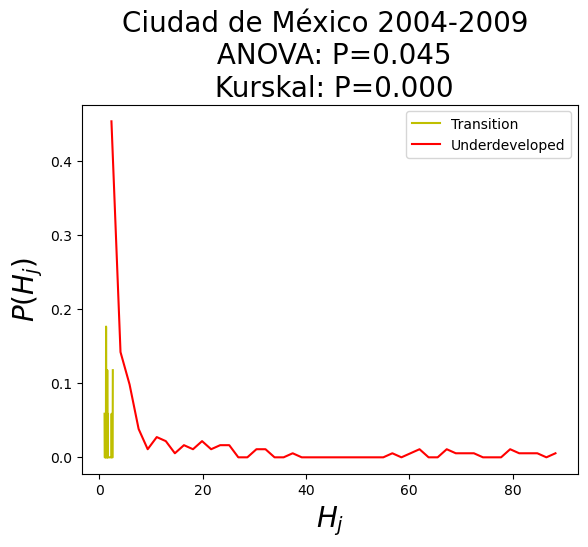

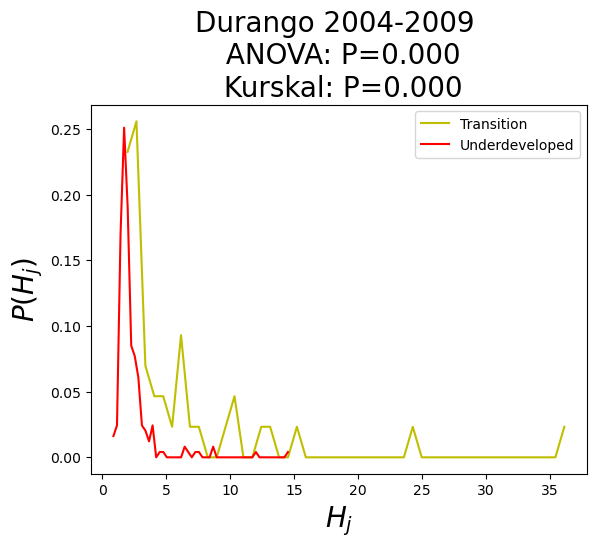

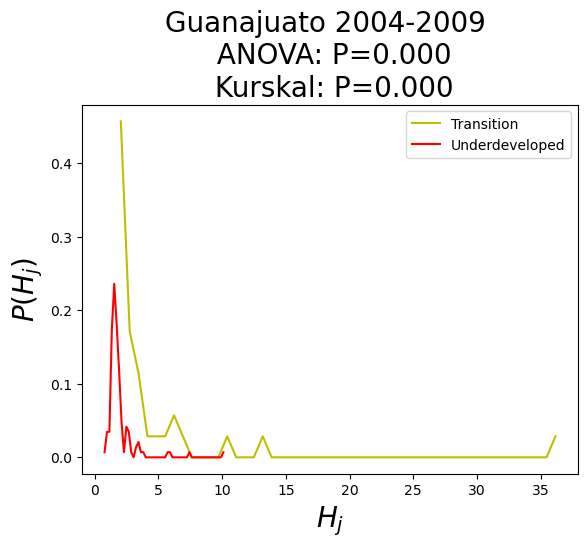

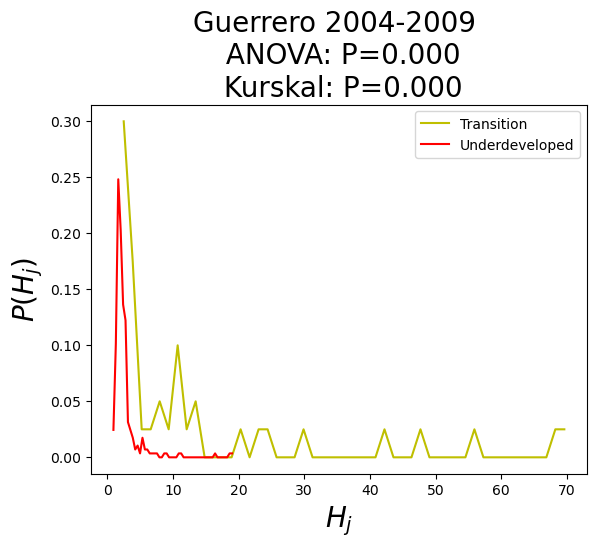

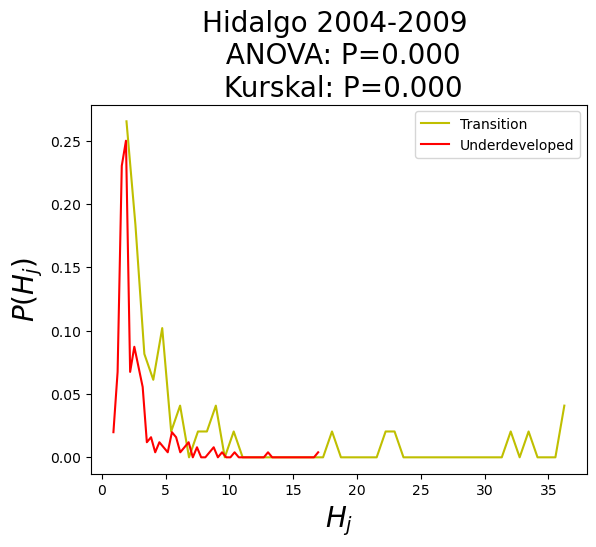

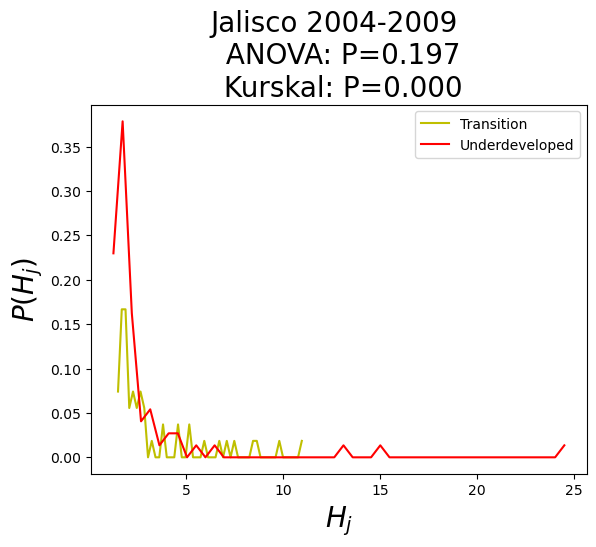

Jalisco 2004-2009 
 ANOVA: P=0.197
 Kurskal: P=0.000


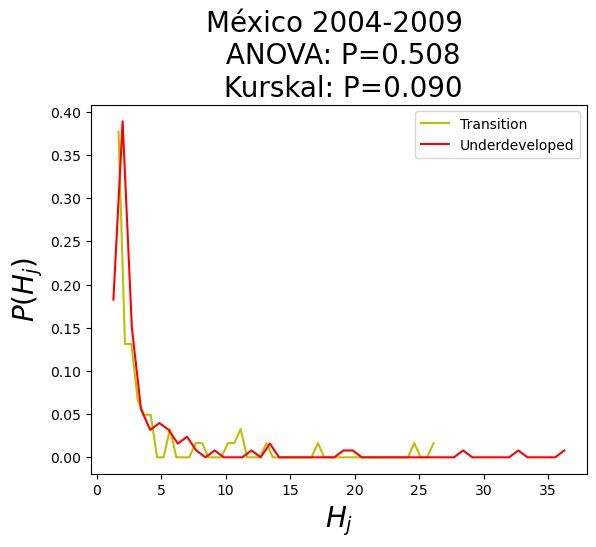

México 2004-2009 
 ANOVA: P=0.508
 Kurskal: P=0.090


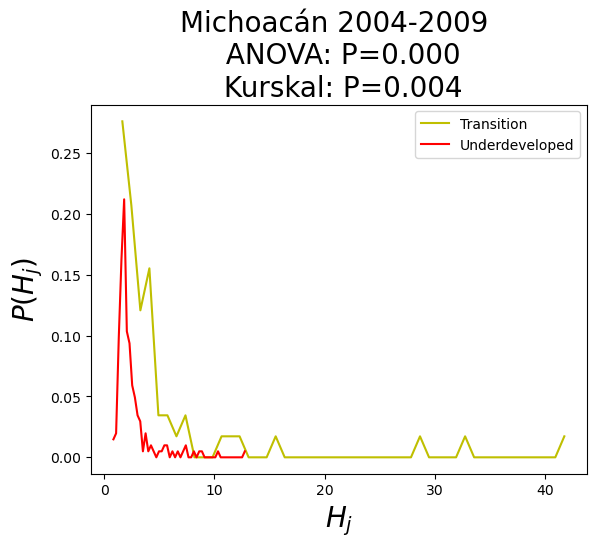

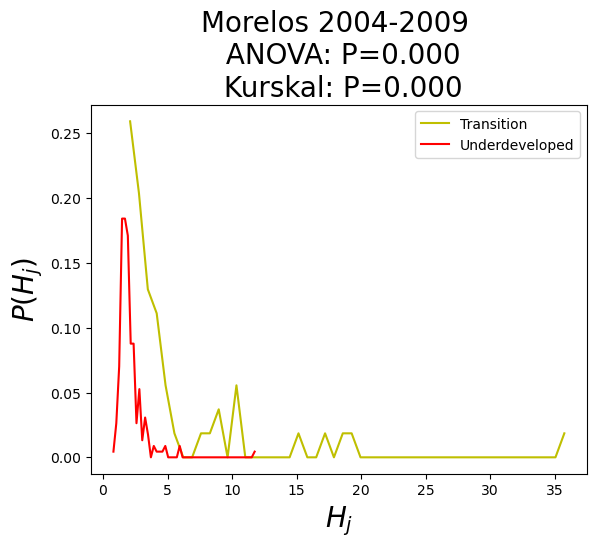

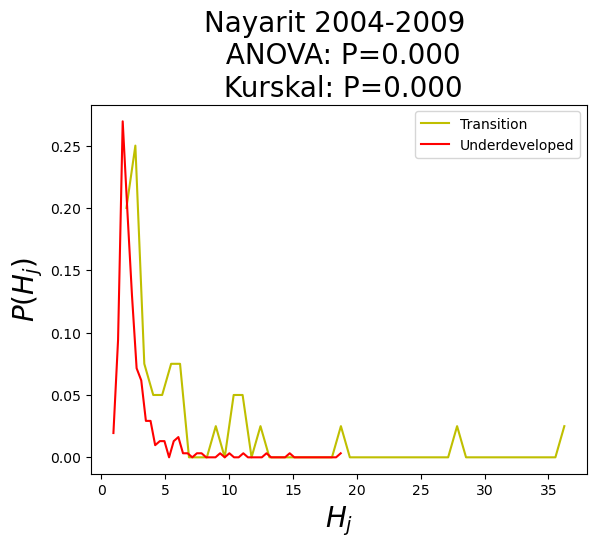

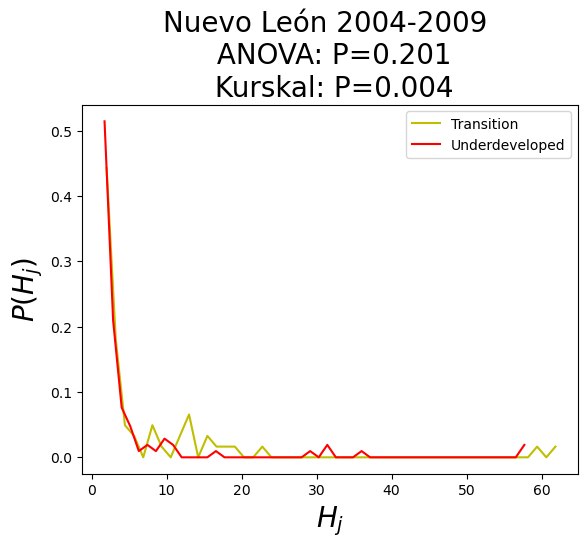

Nuevo León 2004-2009 
 ANOVA: P=0.201
 Kurskal: P=0.004


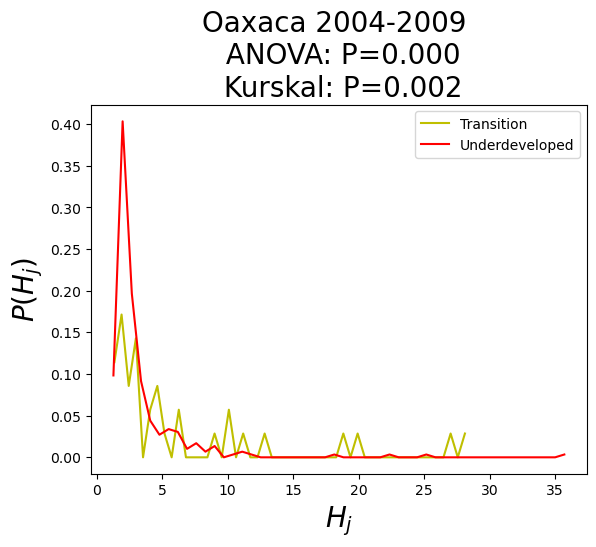

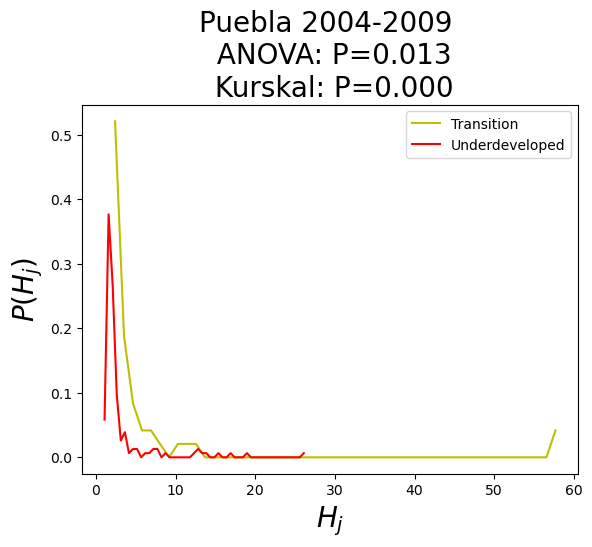

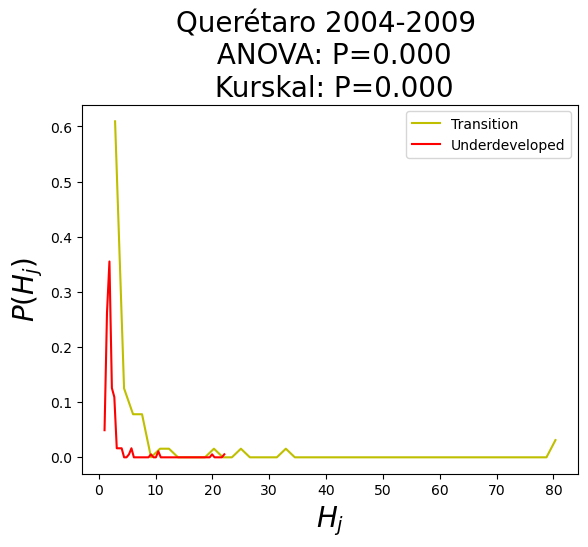

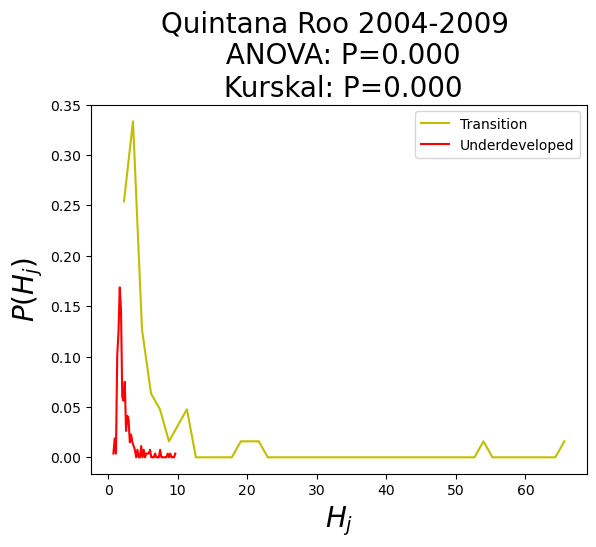

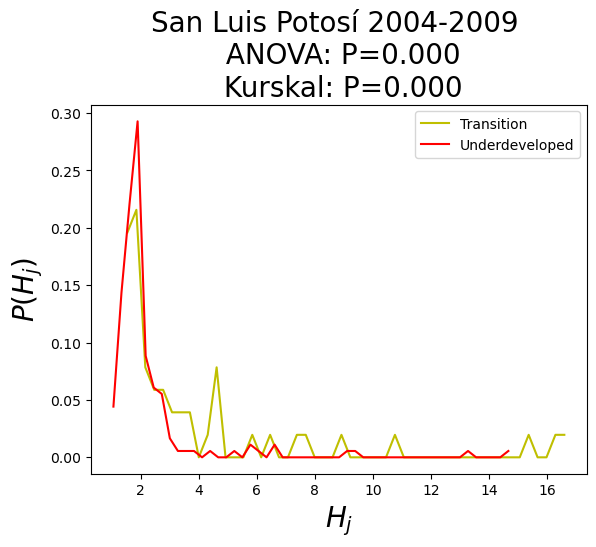

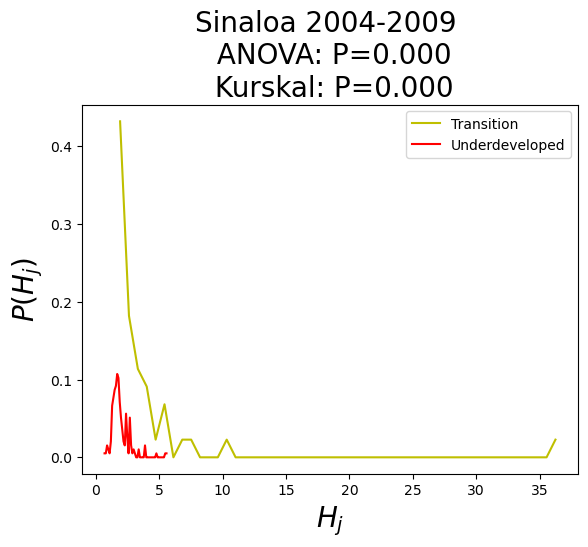

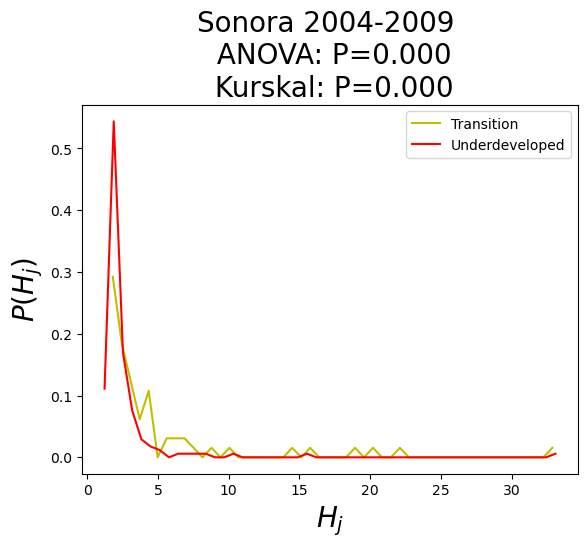

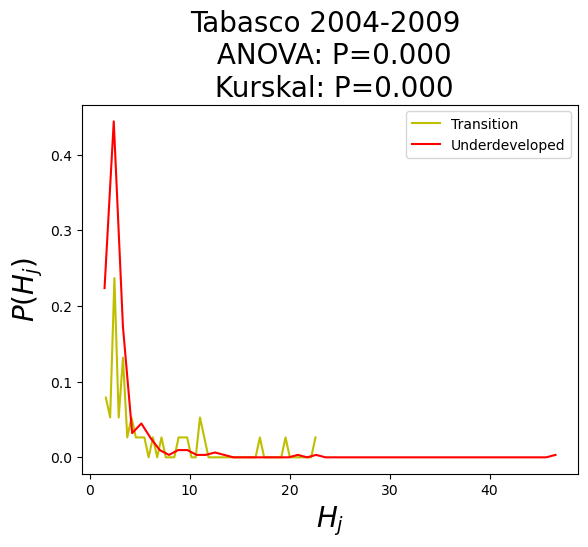

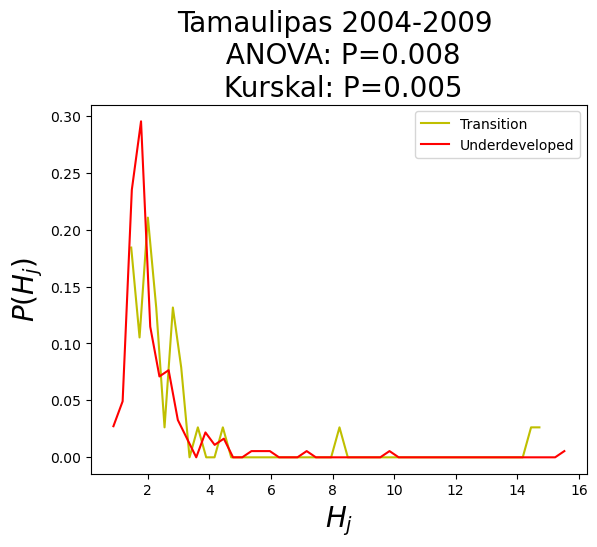

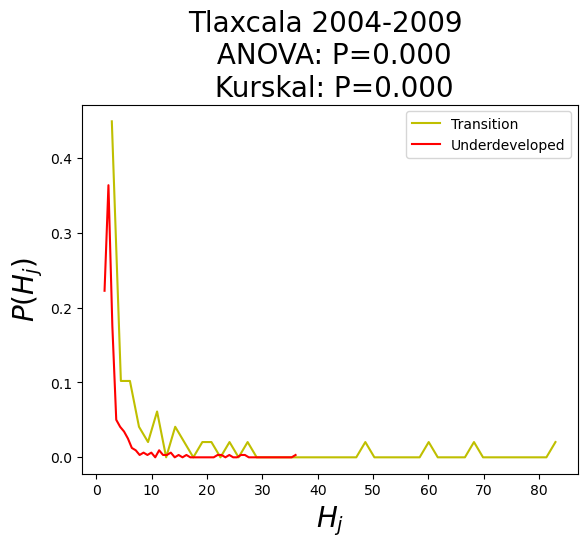

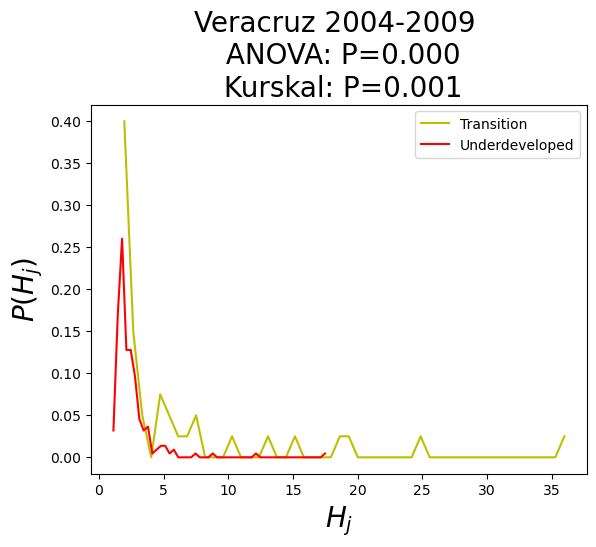

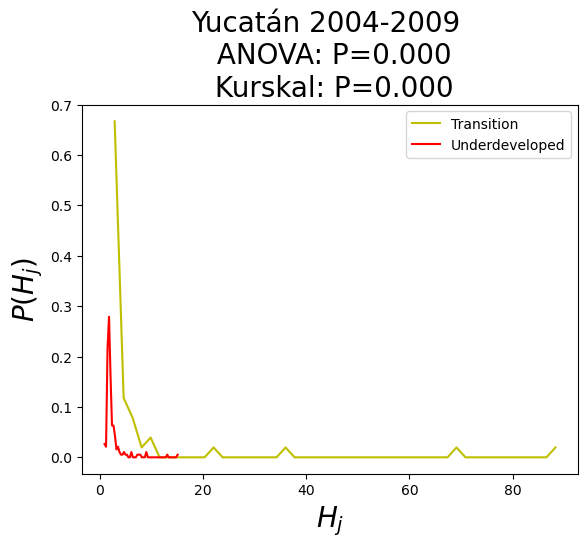

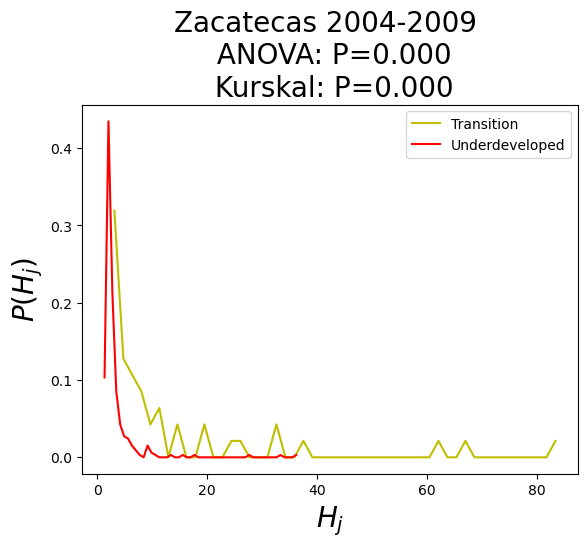

In [51]:
for Estado in Estados:
    prob_disc_trans , prob_disc_under,disc_trans,disc_under = discovery_prob(Estado=Estado,
                                            trans_df=Transition_04_09,
                                            under_df=underdeveloped_04_09,
                                            disc_df=Discovery_04_09,
                                            year1=2004,year2=2009)

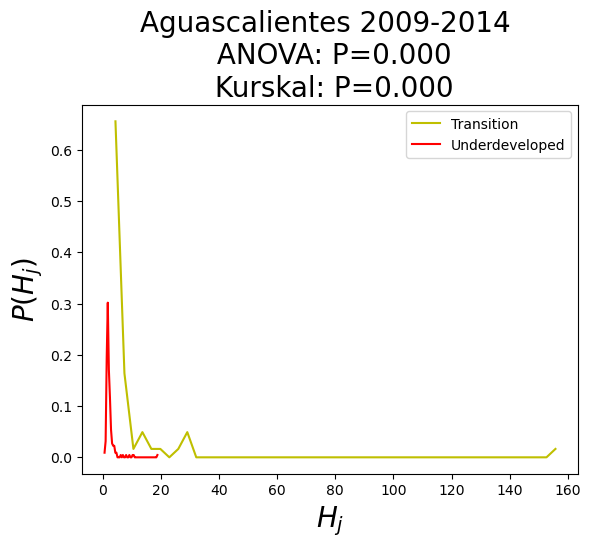

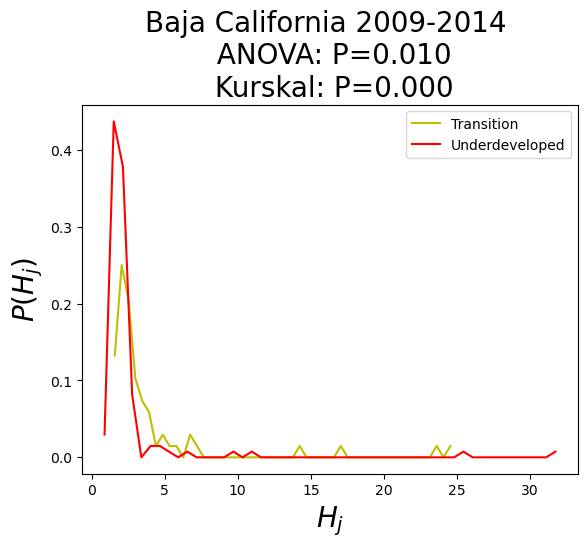

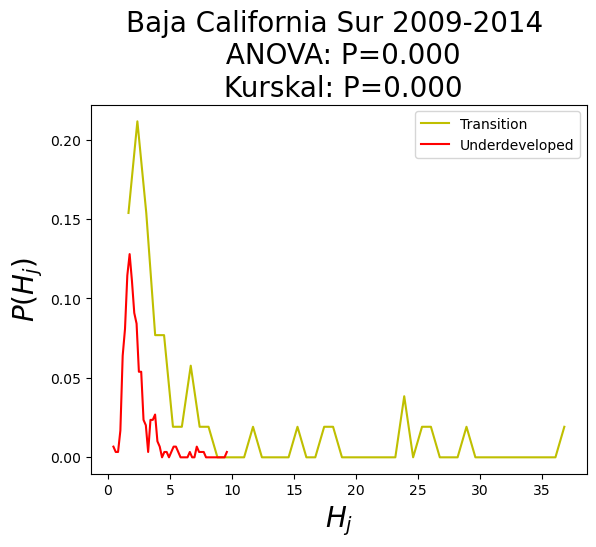

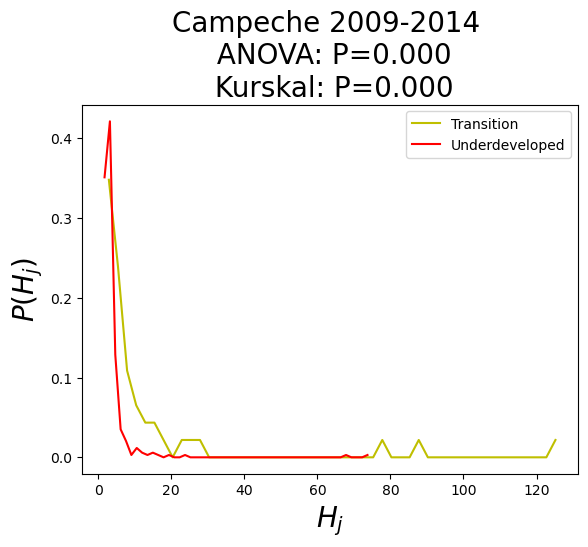

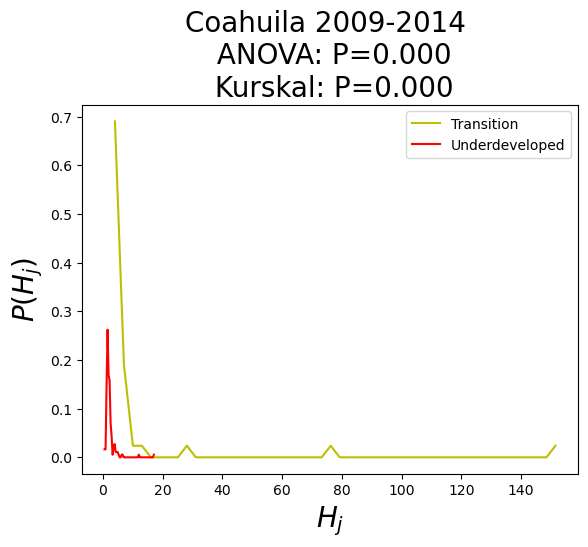

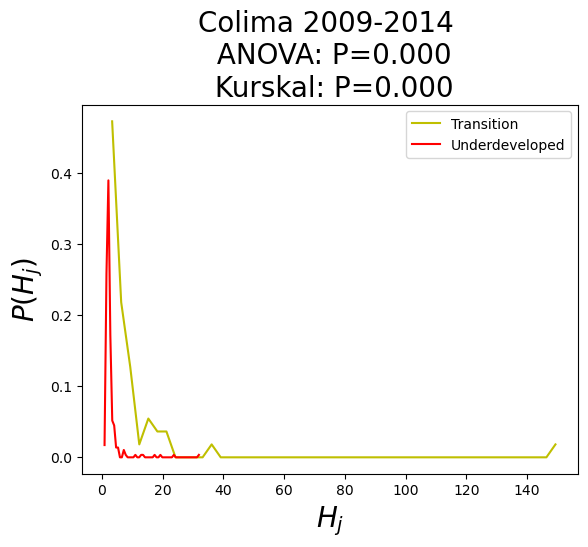

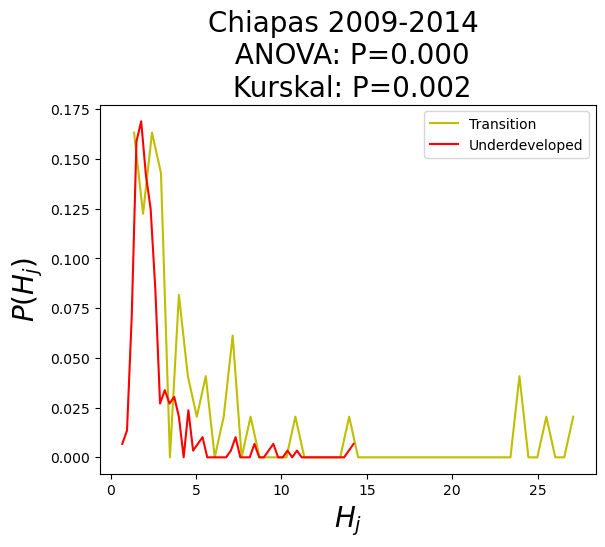

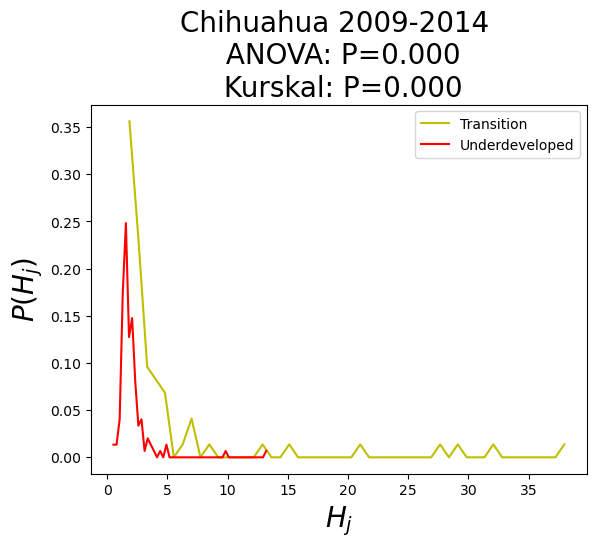

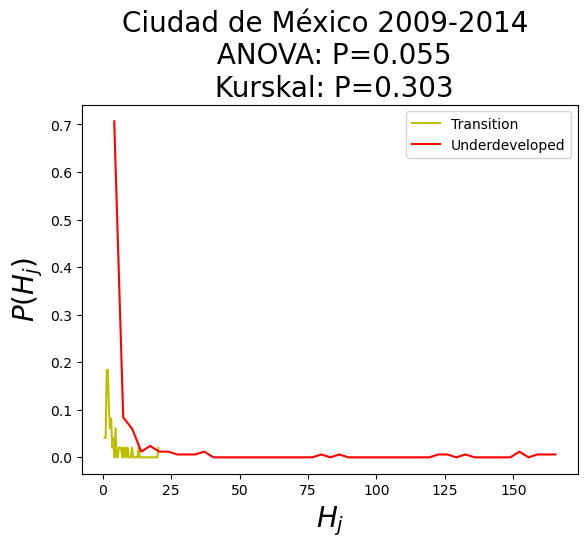

Ciudad de México 2009-2014 
 ANOVA: P=0.055
 Kurskal: P=0.303


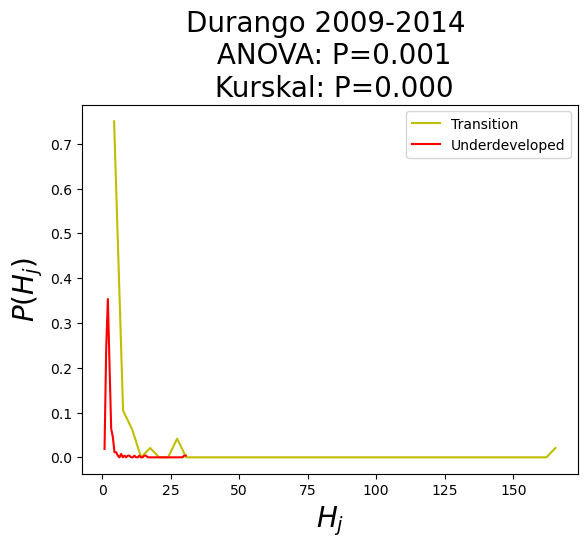

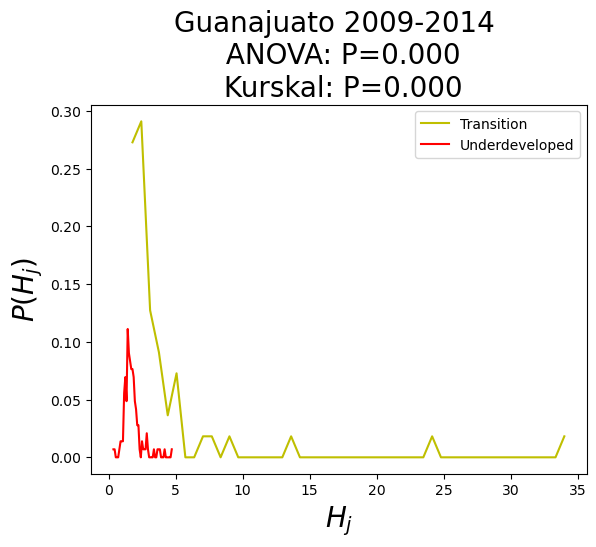

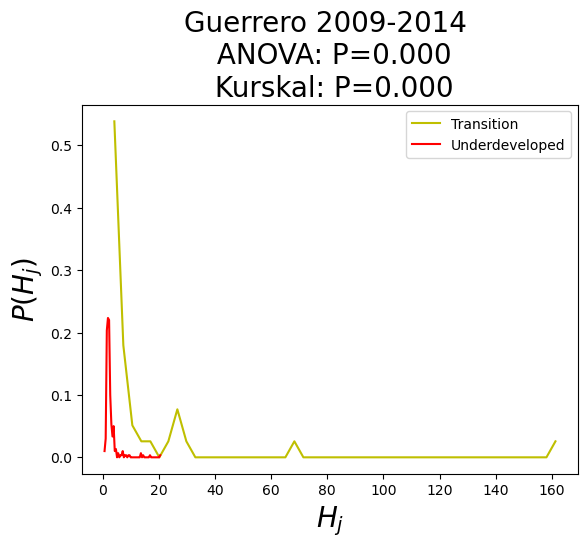

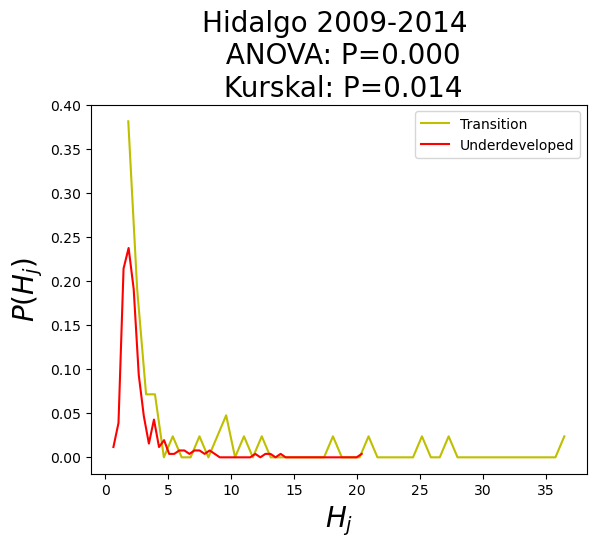

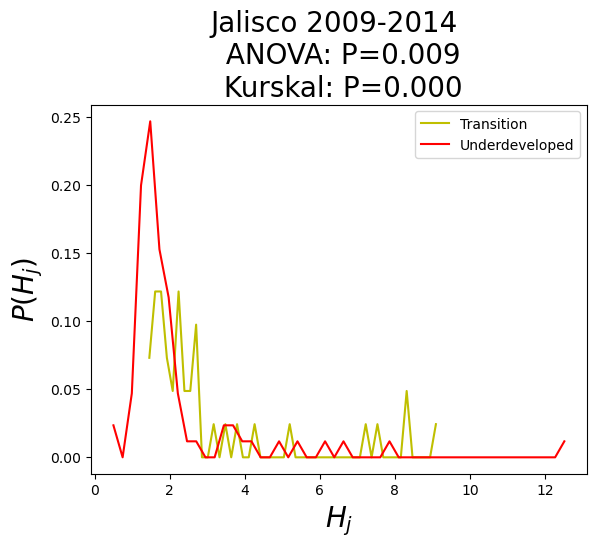

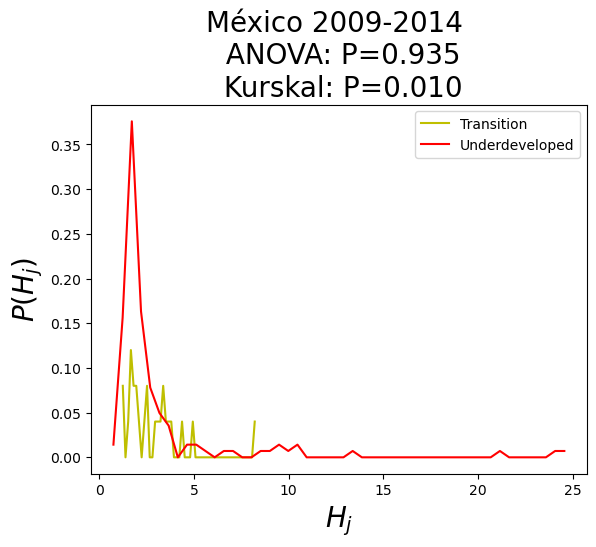

México 2009-2014 
 ANOVA: P=0.935
 Kurskal: P=0.010


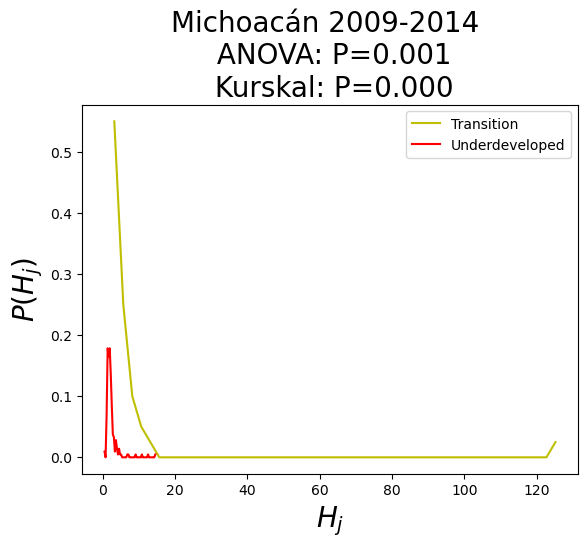

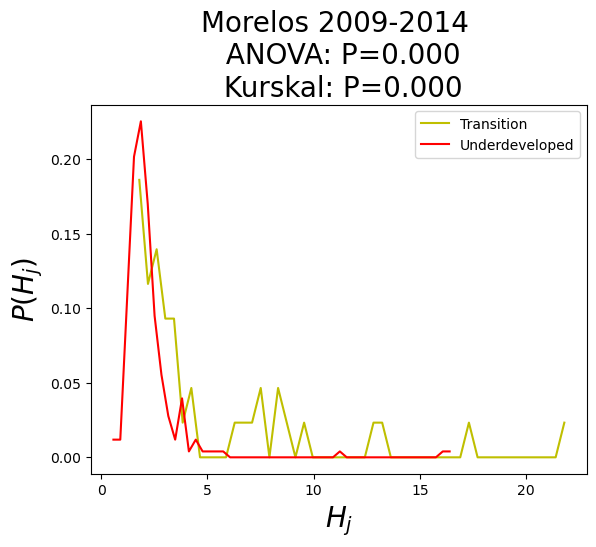

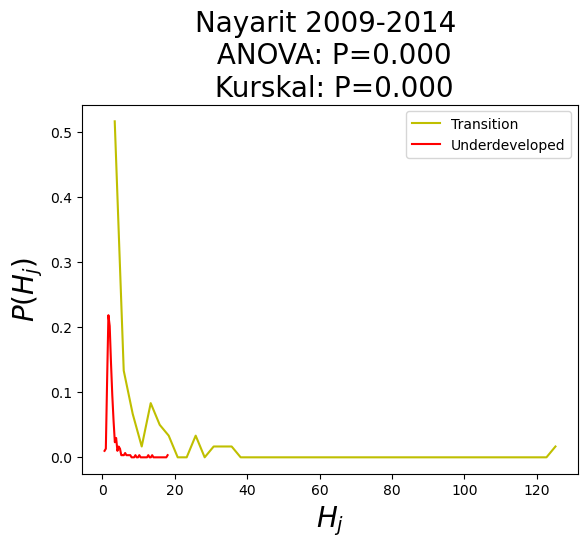

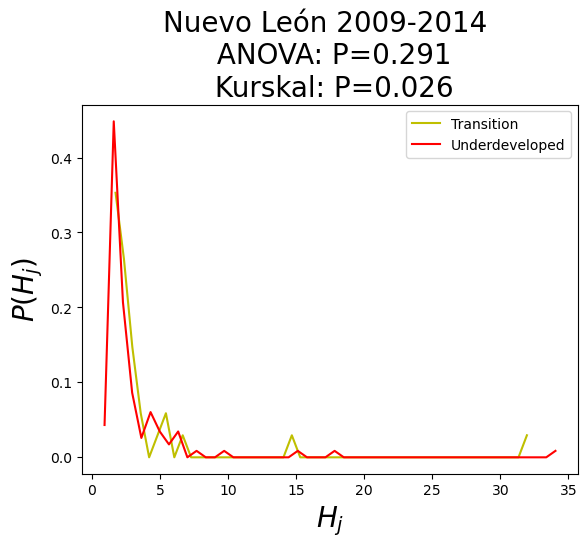

Nuevo León 2009-2014 
 ANOVA: P=0.291
 Kurskal: P=0.026


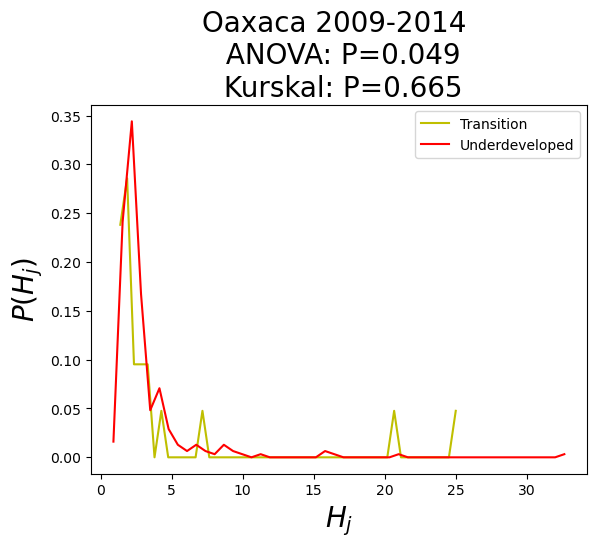

Oaxaca 2009-2014 
 ANOVA: P=0.049
 Kurskal: P=0.665


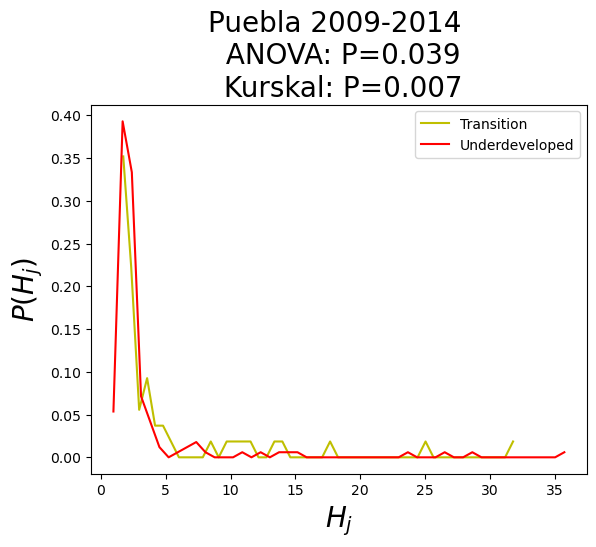

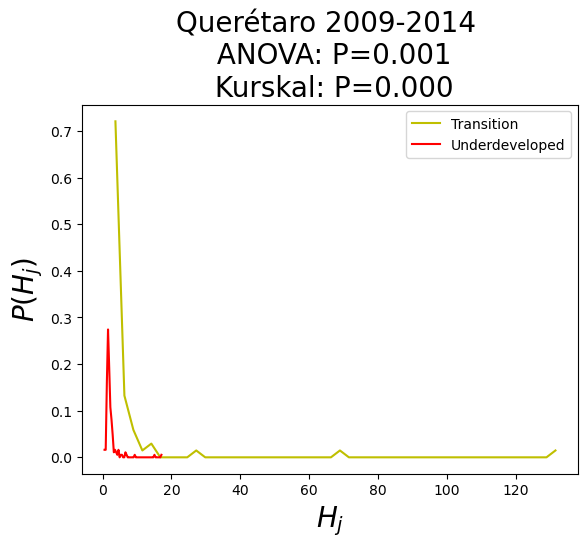

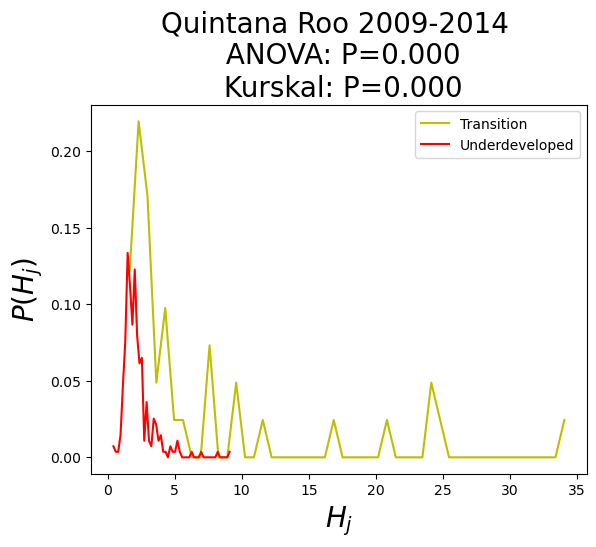

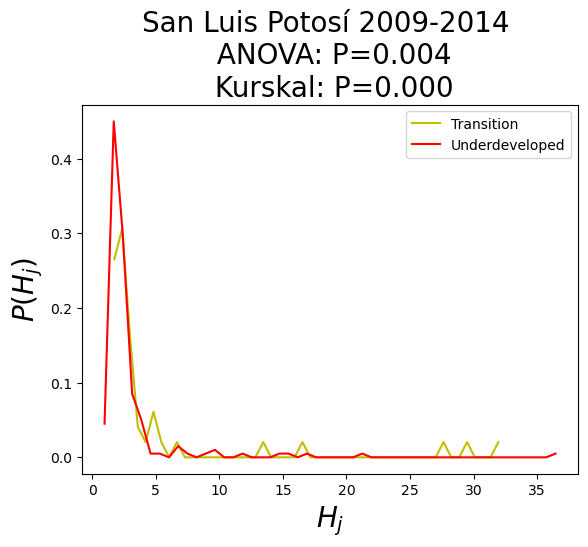

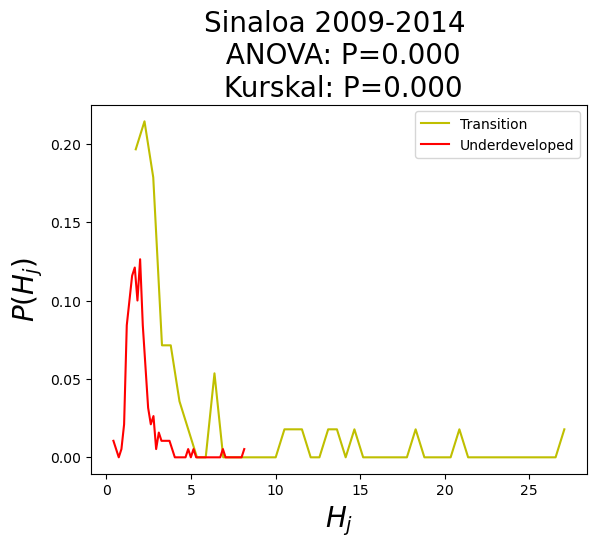

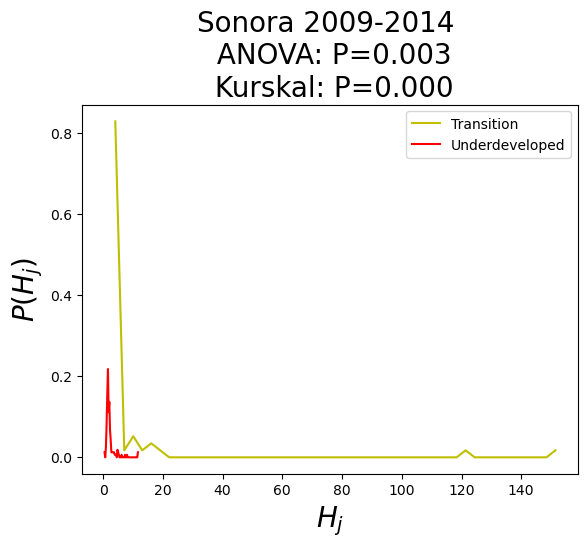

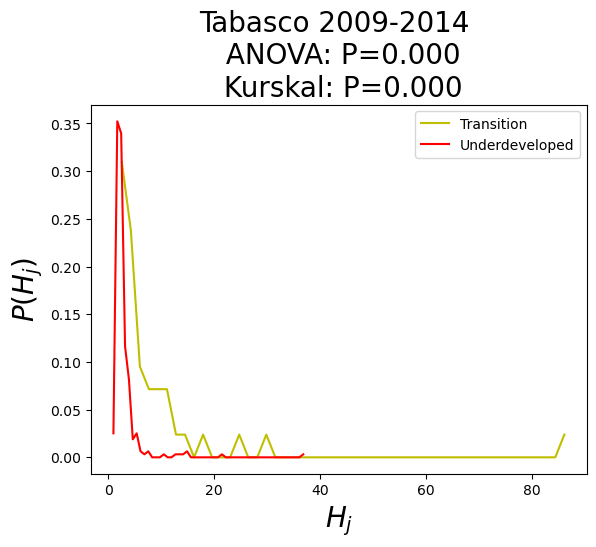

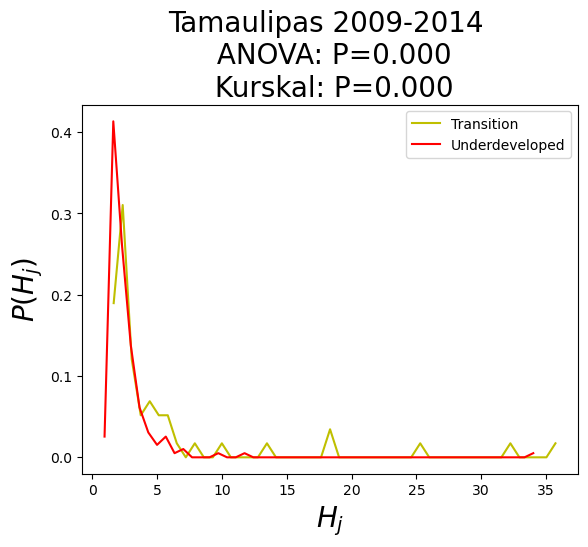

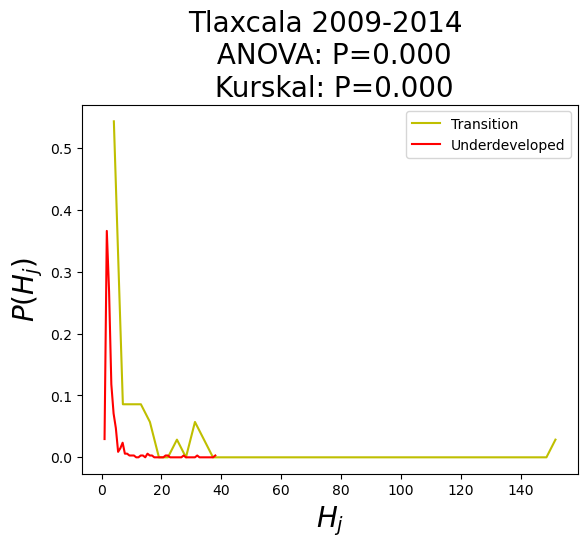

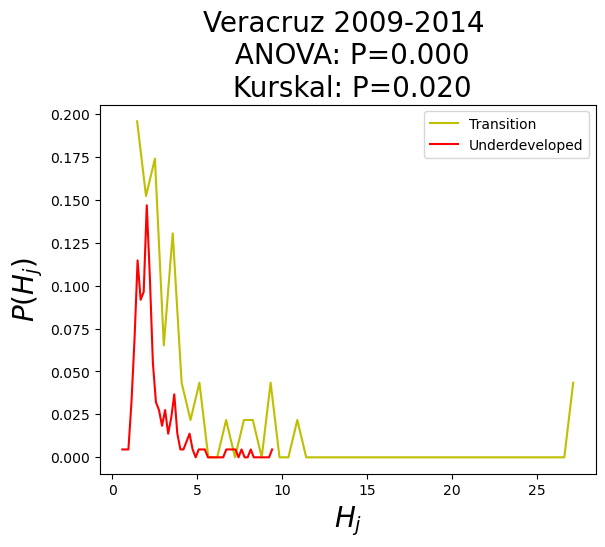

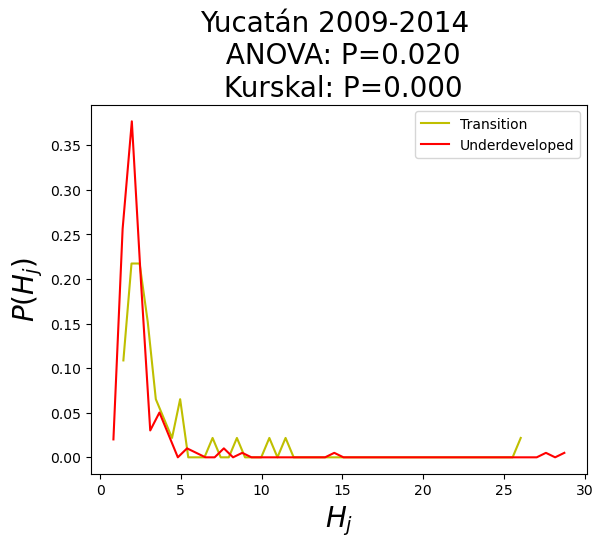

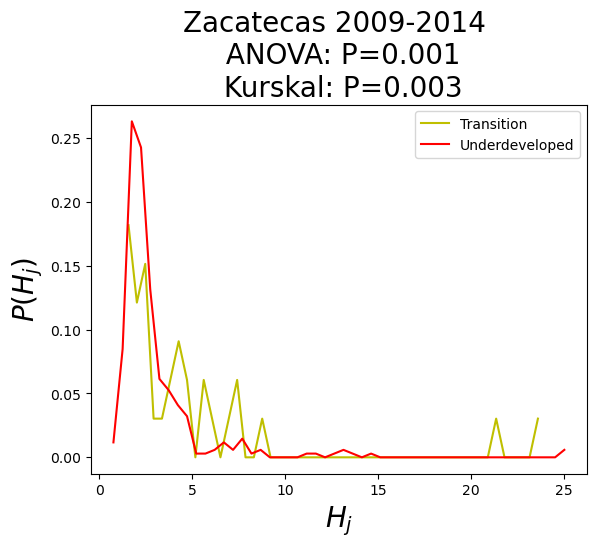

In [52]:
for Estado in Estados:
    prob_disc_trans , prob_disc_under,disc_trans,disc_under = discovery_prob(Estado=Estado,
                                            trans_df=Transition_09_14,
                                            under_df=underdeveloped_09_14,
                                            disc_df=Discovery_09_14,
                                            year1=2009,year2=2014)

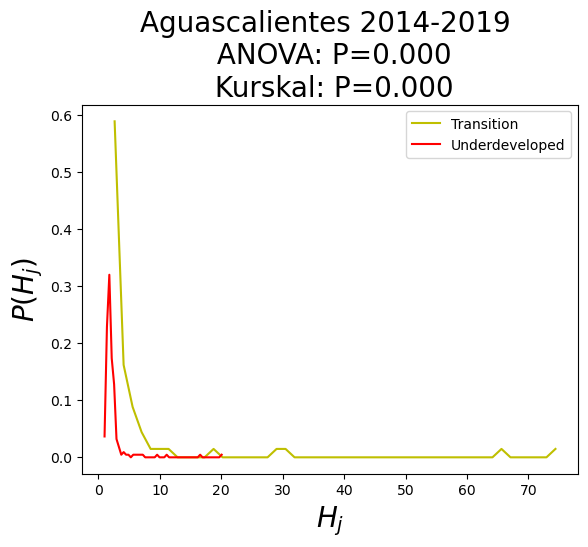

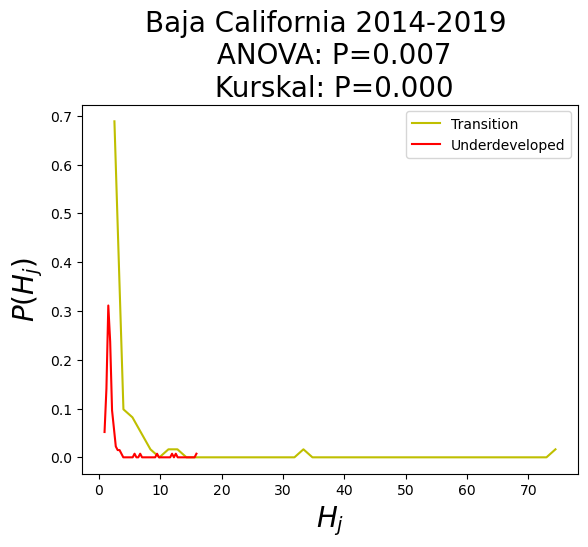

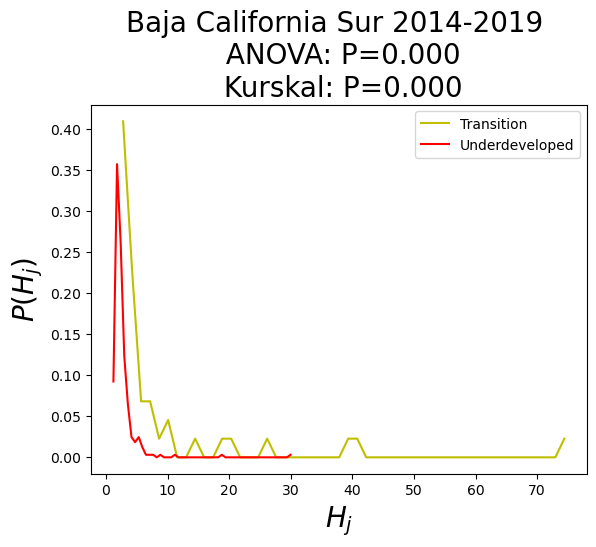

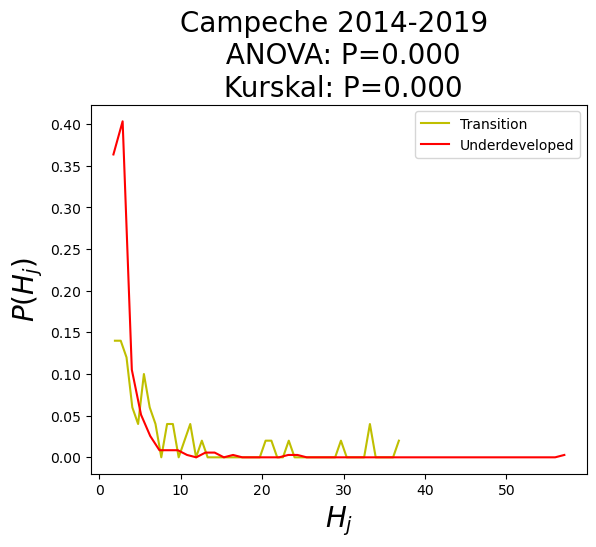

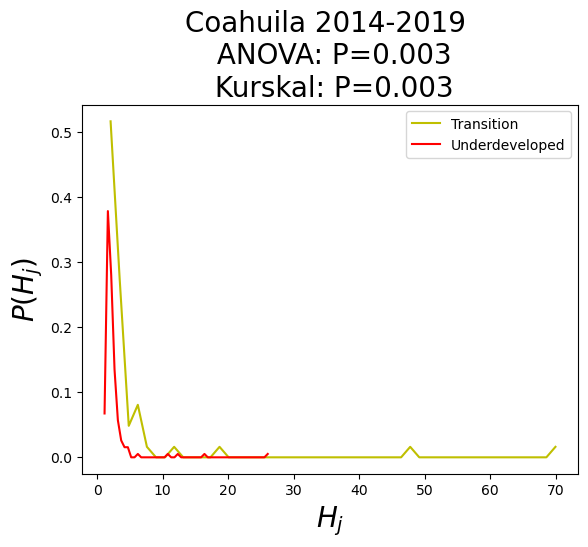

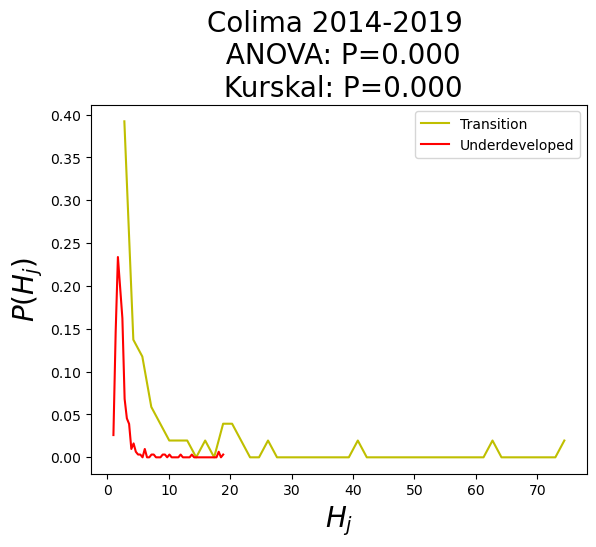

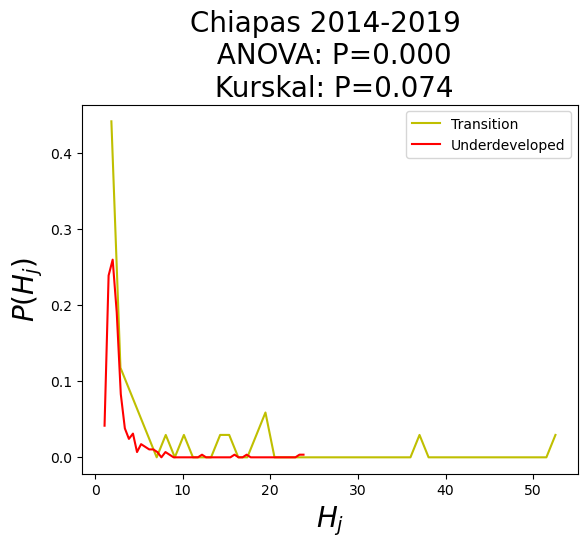

Chiapas 2014-2019 
 ANOVA: P=0.000
 Kurskal: P=0.074


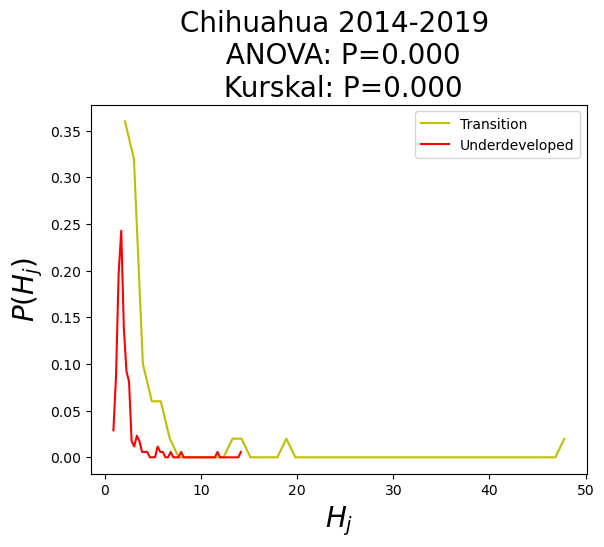

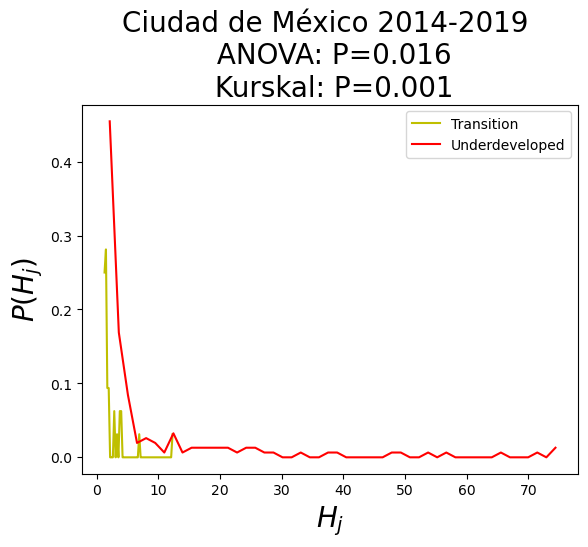

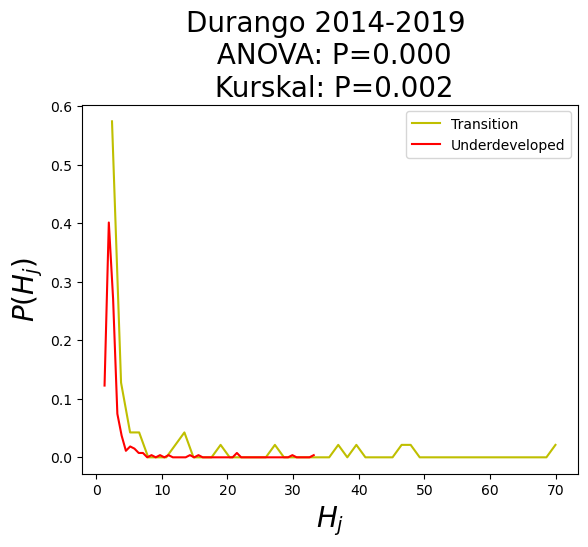

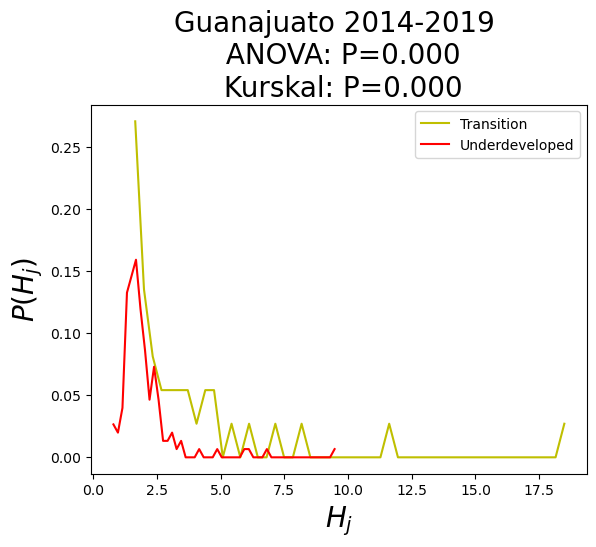

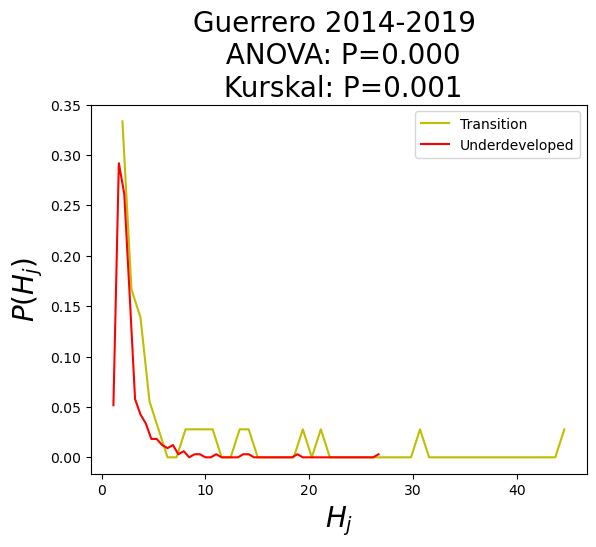

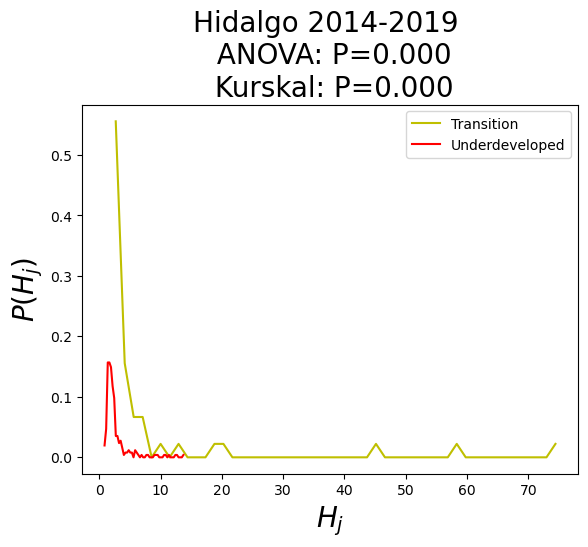

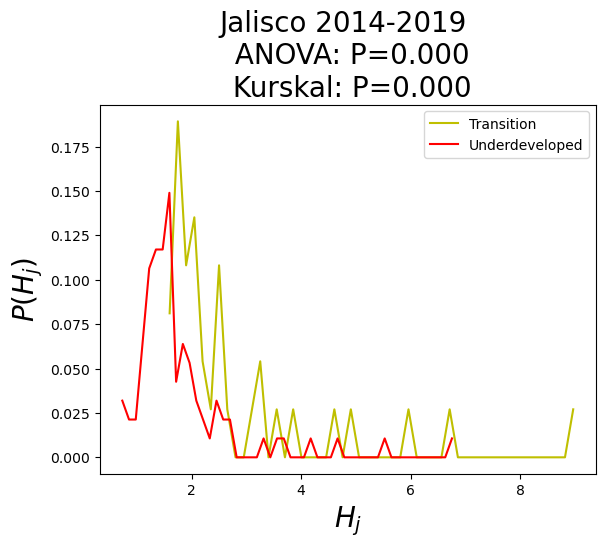

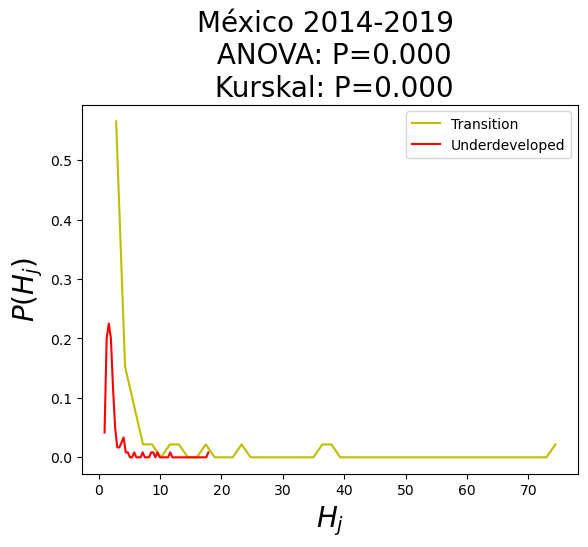

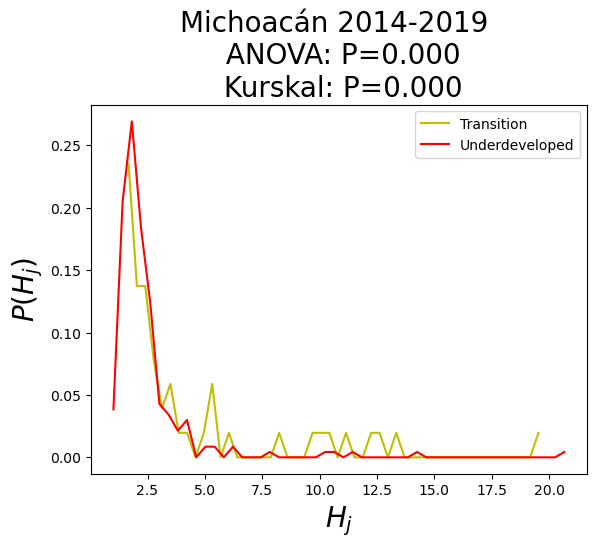

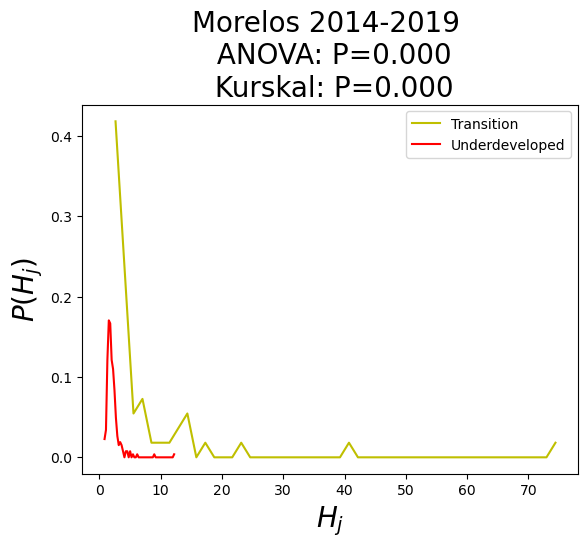

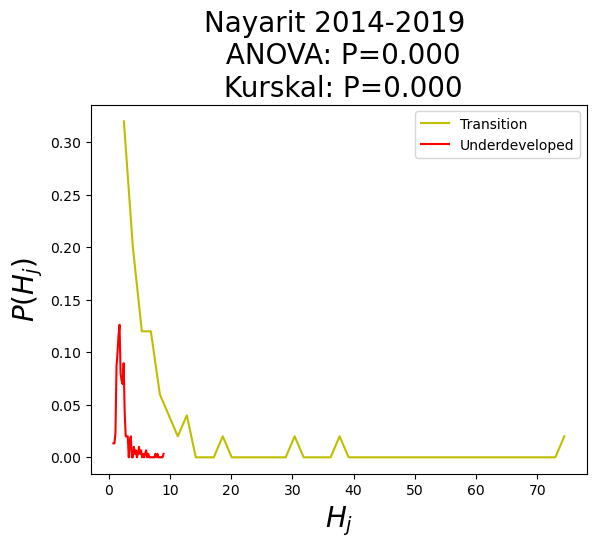

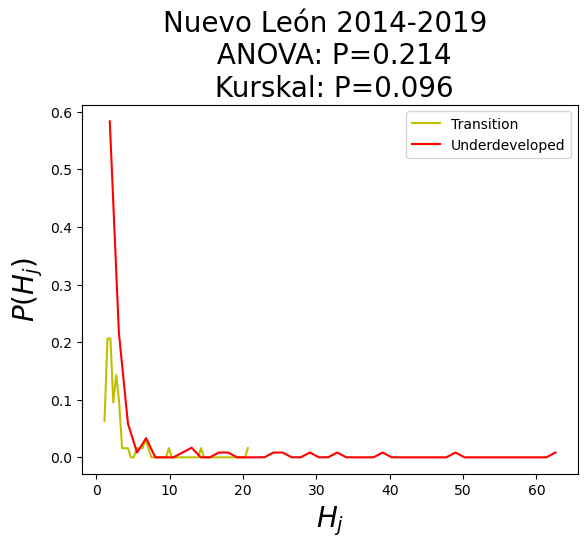

Nuevo León 2014-2019 
 ANOVA: P=0.214
 Kurskal: P=0.096


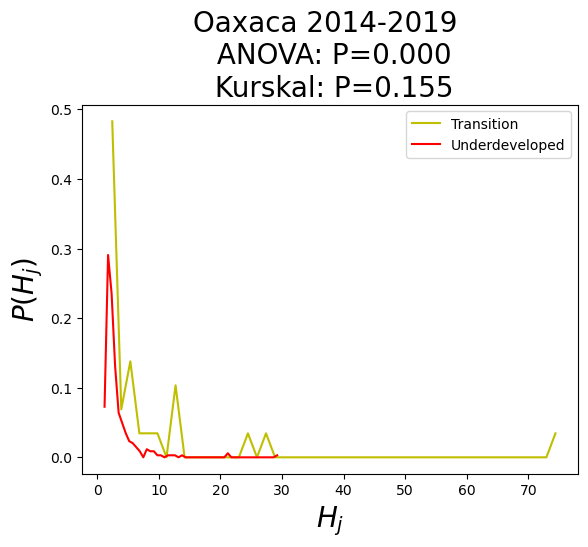

Oaxaca 2014-2019 
 ANOVA: P=0.000
 Kurskal: P=0.155


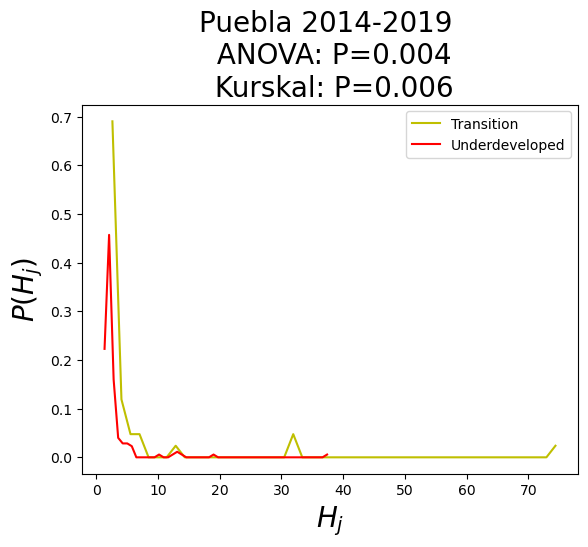

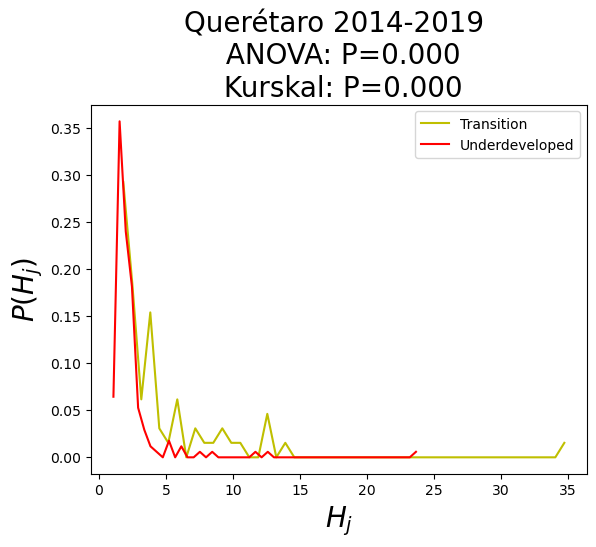

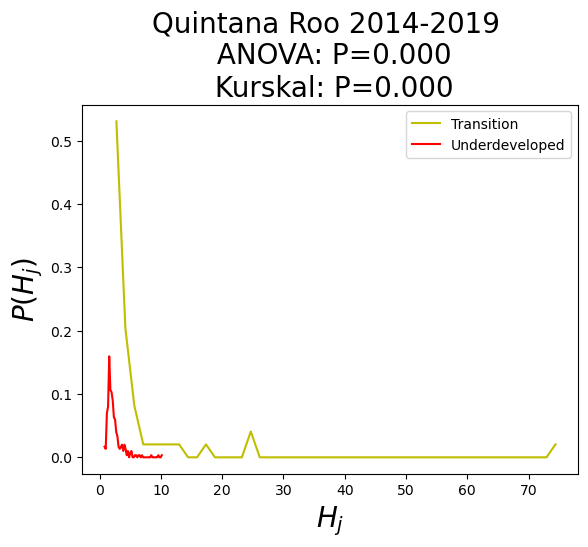

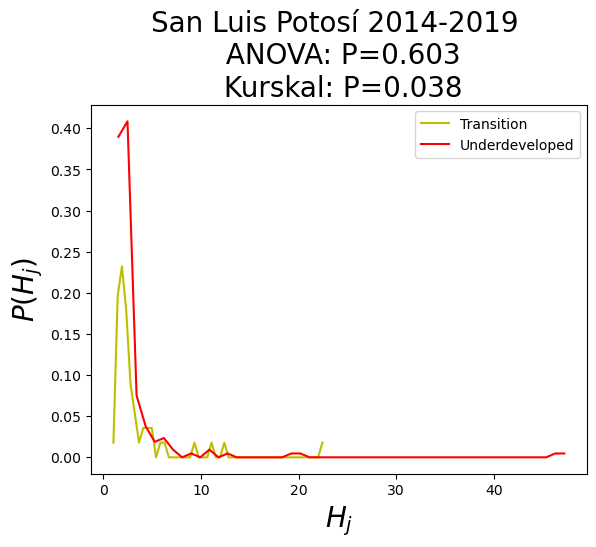

San Luis Potosí 2014-2019 
 ANOVA: P=0.603
 Kurskal: P=0.038


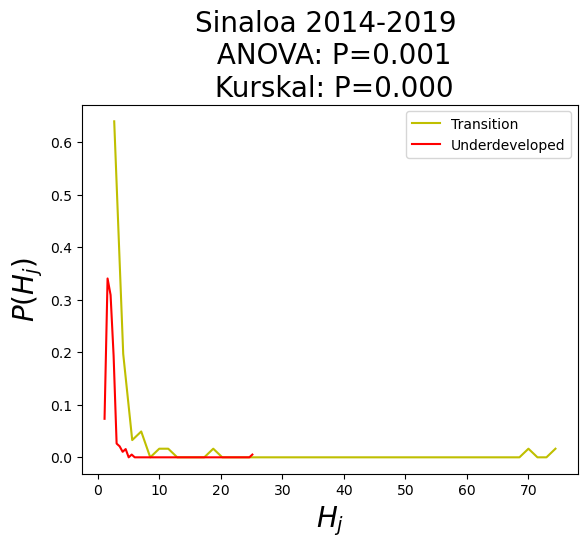

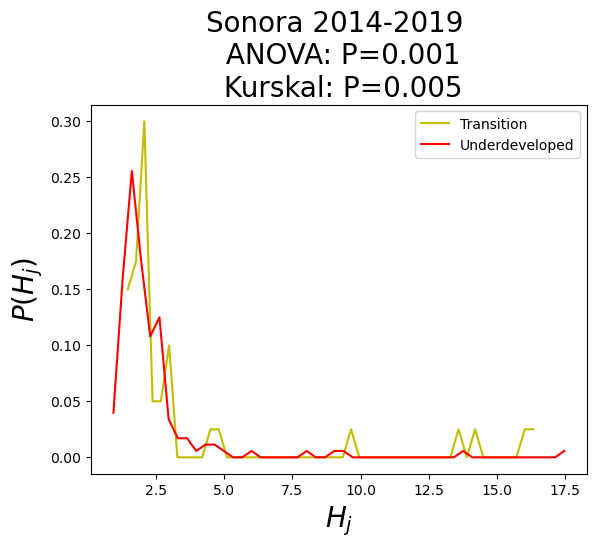

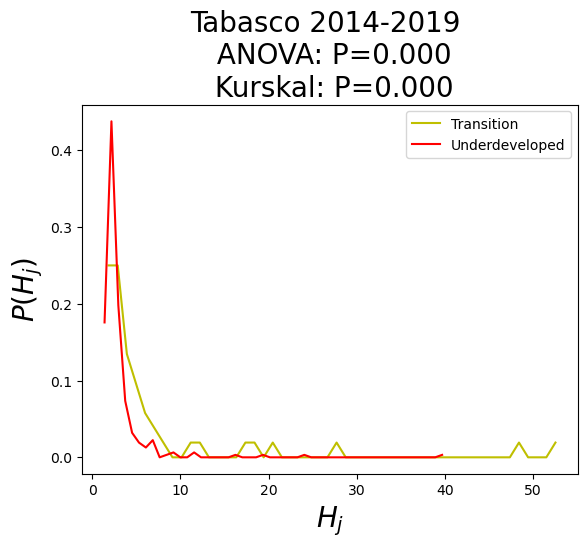

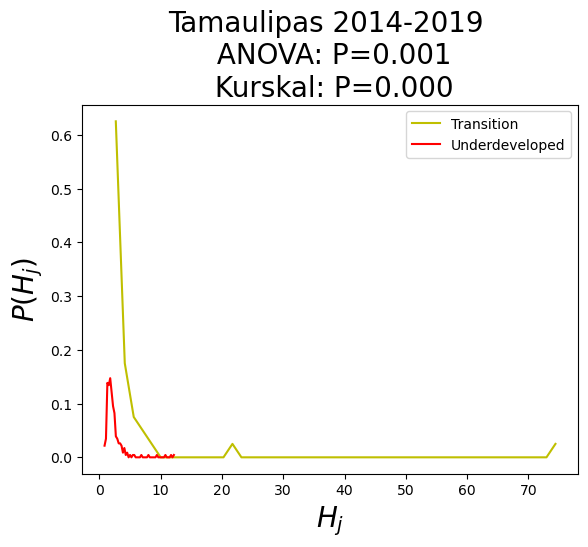

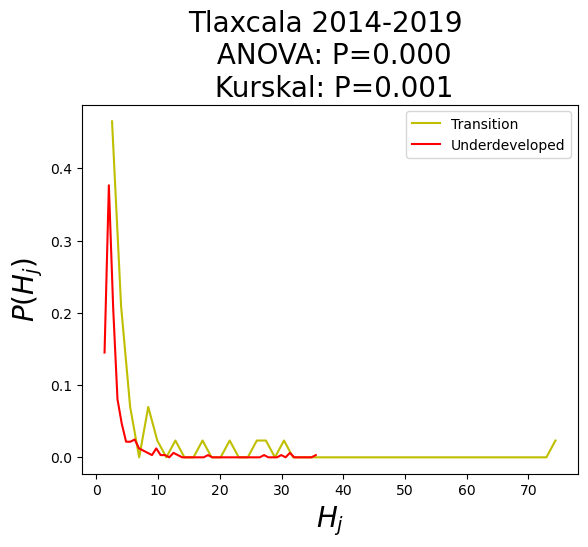

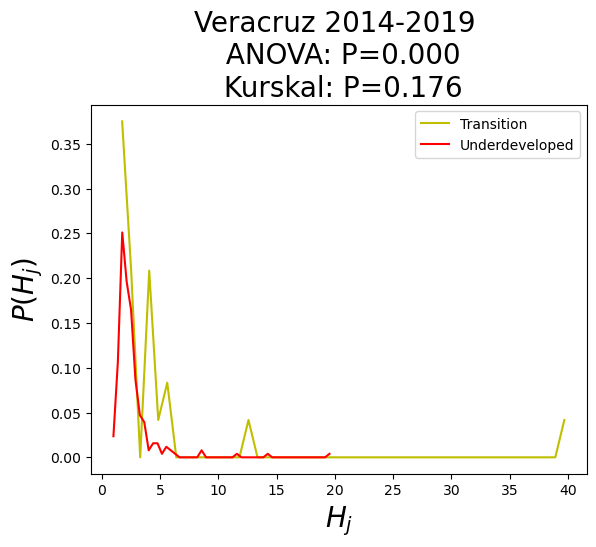

Veracruz 2014-2019 
 ANOVA: P=0.000
 Kurskal: P=0.176


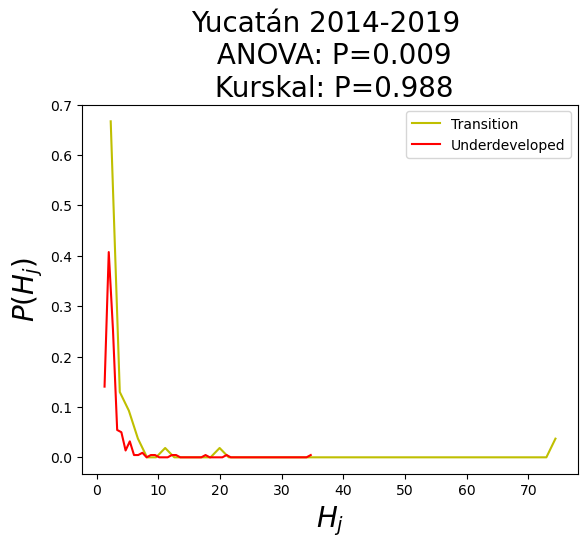

Yucatán 2014-2019 
 ANOVA: P=0.009
 Kurskal: P=0.988


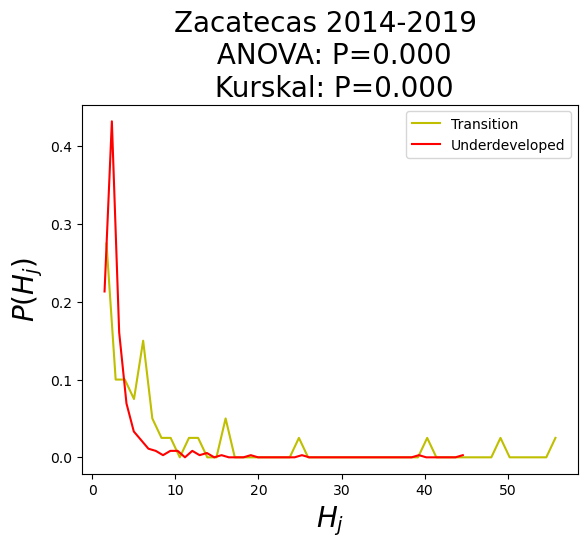

In [53]:
for Estado in Estados:
    prob_disc_trans , prob_disc_under,disc_trans,disc_under = discovery_prob(Estado=Estado,
                                            trans_df=Transition_14_19,
                                            under_df=underdeveloped_14_19,
                                            disc_df=Discovery_14_19,
                                            year1=2014,year2=2019)